In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Índice<a id='ind'></a>

- [1. Bibliotecas](#bib)
- [2. Leitura dos dados](#leitura)
- [3. Inspeção inicial nos dados](#inspecao)
- [4. Distribuições das variáveis](#distri)
    - [4.1 Variáveis categóricas](#distr_varcat)
    - [4.2 Variáveis numéricas](#distr_varnum)
- [5. Eliminação de pontos outliers](#eliminOut)
- [6. Testes de hipóteses](#hip)
    - [6.1 Realização dos testes de hipóteses](#realiza_th)
    - [6.2 Visualização dos testes de hipóteses](#visualiza_th)
- [7. Correlações](#corr)
    - [7.1 Correlações entre as variáveis contínuas](#corr_cont)
    - [7.2 Correlações com a variável alvo: 'class'](#corr_alvo)
- [8. Modelos preditivos](#mod_pred)
    - [8.1 Demonstração das transformações](#trasf)
    - [8.2 Análise dos resultados dos modelos](#ana_modelos)


## 1. Bibliotecas <a id='bib'></a>
[Índice](#ind)

In [175]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# para teste de hipóteses
from scipy.stats import ttest_ind


import importlib    
from pathlib import Path
import os

# bibliotecas pessais
import modulos.template as tmp
import modulos.anotacoes as an
import modulos.limites as li
import modulos.teste_hip as th

# define o tema so seaborn
sns.set_theme(style='white')

# foam de exibição de dataframes
pd.pandas.set_option('display.max_columns', None)

In [173]:
#importlib.reload(tmp)
#importlib.reload(an)
#importlib.reload(li)
#importlib.reload(th)

## 2. Leitura e informações sobre os dados<a  id="leitura"></a>
[Índice](#ind)

Fonte dos dados originais:
https://www.kaggle.com/datasets/kukuroo3/body-performance-data

Os dados são relativos ao desempenho de pessoas em exercícios físicos. Neles estão contidos diversas informações sobre características das pessoas, tais como, idade, sexo, altura, dentre outras, A coluna ‘class’ contém a classificação quanto ao desempenho em atividades físicas com 4 valores possíveis, A,B,C e D, sendo a classe A a melhor possível.

- **age:** idade 
- **gender:** sexo
- **height_cm:** altura em centímetro
- **weight_kg:** peso em quilograma
- **body fat_%:** porcentagem de gordura corporal
- **diastolic:** pressão sanguínea diastólica (min)
- **systolic:** pressão sanguínea sistólica (min)
- **gripForce:** força aplicada pela mão para puxar ou suspender objetos
- **sit and bend forward_cm:** medidas para o "sente-se e incline-se para a frente" em cm 
- **sit-ups counts:** número de vezes que a pessoa consegue sentar a levantar por um intervalo de tempo
- **broad jump_cm:** distância de um salto largo em cm
- **class:** classificação quanto ao desempenho em atividades físicas. Pode assumir 4 valores, A, B, C e D, sendo a classe A a melhor possível.
 


In [5]:
# importa os dados
current_path = os.getcwd()
path_dados=Path(current_path)/"dados"
df=pd.read_csv(path_dados/"bodyPerformance.csv", low_memory=False)
df.head(4)

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B

## 3. Inspeção inicial nos dados<a id="inspecao"></a>
[Índice](#ind)

**Dimensão dos dados**

In [6]:
# dimensão do dataset
print("Número de colunas nos dados: ",df.shape[1])
print("Número de linhas nos dados: ",df.shape[0])

Número de colunas nos dados:  12
Número de linhas nos dados:  13393


**Identificação do tipo de variável e contabilização dos dados ausentes**

In [7]:
#identifica dados ausentes e tipo dos dados
pd.DataFrame(zip(df.columns,                 
                 df.dtypes.values,
                 df.isnull().sum().values,),
             columns=["variável", "tipo","num. de dados ausentes"])

variável     tipo  num. de dados ausentes
0                       age  float64                       0
1                    gender   object                       0
2                 height_cm  float64                       0
3                 weight_kg  float64                       0
4                body fat_%  float64                       0
5                 diastolic  float64                       0
6                  systolic  float64                       0
7                 gripForce  float64                       0
8   sit and bend forward_cm  float64                       0
9            sit-ups counts  float64                       0
10            broad jump_cm  float64                       0
11                    class   object                       0

**Identificação das variáveis categóricas e numéricas**

In [8]:
# variáveis categóticas
vars_cat = [x for x in df.columns if df[x].dtype == 'O']
vars_num = [x for x in df.columns if x not in vars_cat]
print("Variáveis categóricas:\n ", vars_cat)
print("Variávies numéricas:\n ", vars_num)

Variáveis categóricas:
  ['gender', 'class']
Variávies numéricas:
  ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']


**Variáveis categóricas: cardinalidade**

In [9]:
# cardinalidade: variáveis categóricas
card=df[vars_cat].nunique()
df_card=pd.DataFrame(zip(vars_cat,card),\
                     columns=["variável", "cardinalidade"])

df_card.style.background_gradient()

**Variáveis numéricas: estatísticas**

In [10]:
df[vars_num].describe().style.background_gradient()

## 4. Distribuições das variáveis<a id="distri"></a>
[Índice](#ind)


### 4.1 Variáveis categóricas <a id="distr_varcat"></a>

In [12]:
# dataframes com total de elementos nas classe
df_gender = df.groupby('gender', as_index=False).agg(        
        count_gender=("gender", "count")
    )

df_class = df.groupby('class', as_index=False).agg(        
        count_class=("class", "count")
    )

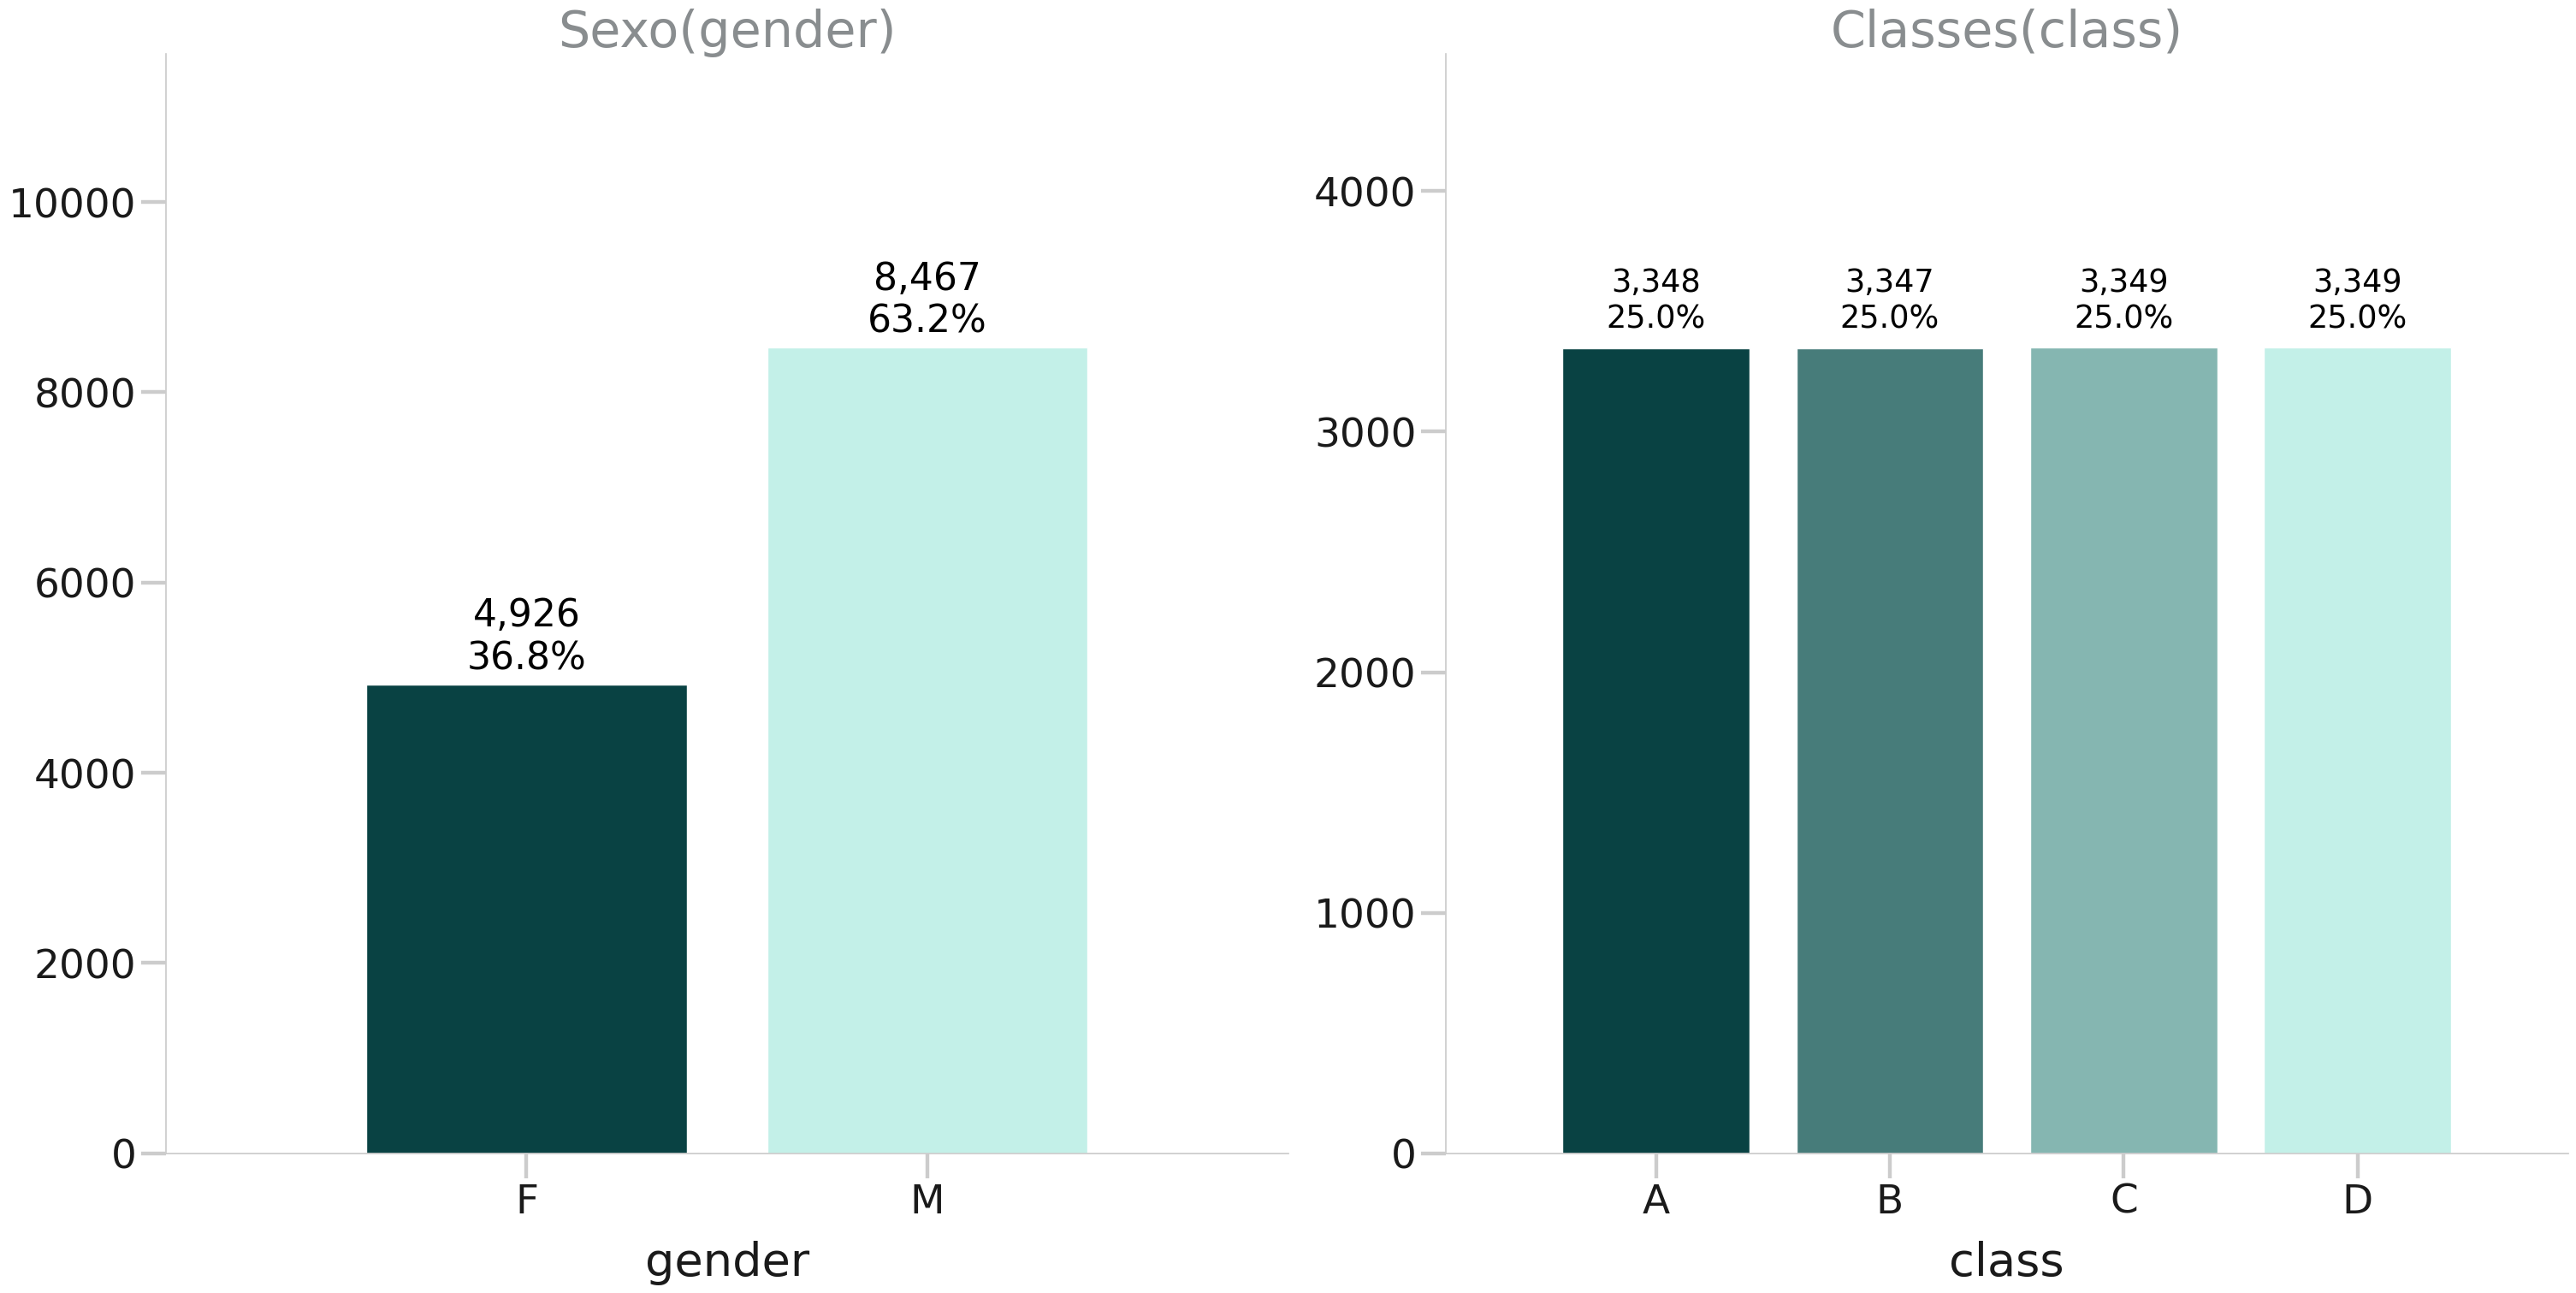

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(30, 15))

gs = GridSpec(1,2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# soma de todos os elementos nas classse
sumtot_gender=df_gender['count_gender'].sum()
sumtot_class=df_class['count_class'].sum()


# --- grafico 1
sns.barplot(ax=ax1, data=df_gender, x='gender', y='count_gender',
            palette=tmp.pmo_1(len(df_gender)))

# anotações e eixos
tmp.set_axes_2(ax1, "Sexo(gender)", 'gender', '')
an.porc_num_bar_verticais(ax1, f_texto_bar=0.025,f_tam_letra=0.03,
                            sum_tot=sumtot_gender, d_num=0)
li.muda_limites_eixo_y(ax1, frac=0.3)
li.muda_limites_eixo_x(ax1, frac=0.2, tipo_aumento=2)
  


# --- grafico 2
sns.barplot(ax=ax2, data=df_class, x='class', y='count_class',
            palette=tmp.pmo_1(len(df_class)))

# anotações e eixos
tmp.set_axes_2(ax2, "Classes(class)", 'class', '')
an.porc_num_bar_verticais(ax2,f_texto_bar=0.025,f_tam_letra=0.025,
                          sum_tot=sumtot_class, d_num=0)
li.muda_limites_eixo_y(ax2, frac=0.3)
li.muda_limites_eixo_x(ax2, frac=0.1, tipo_aumento=2)

plt.show()

### 4.2 Variáveis numéricas <a id="distr_varnum"></a>

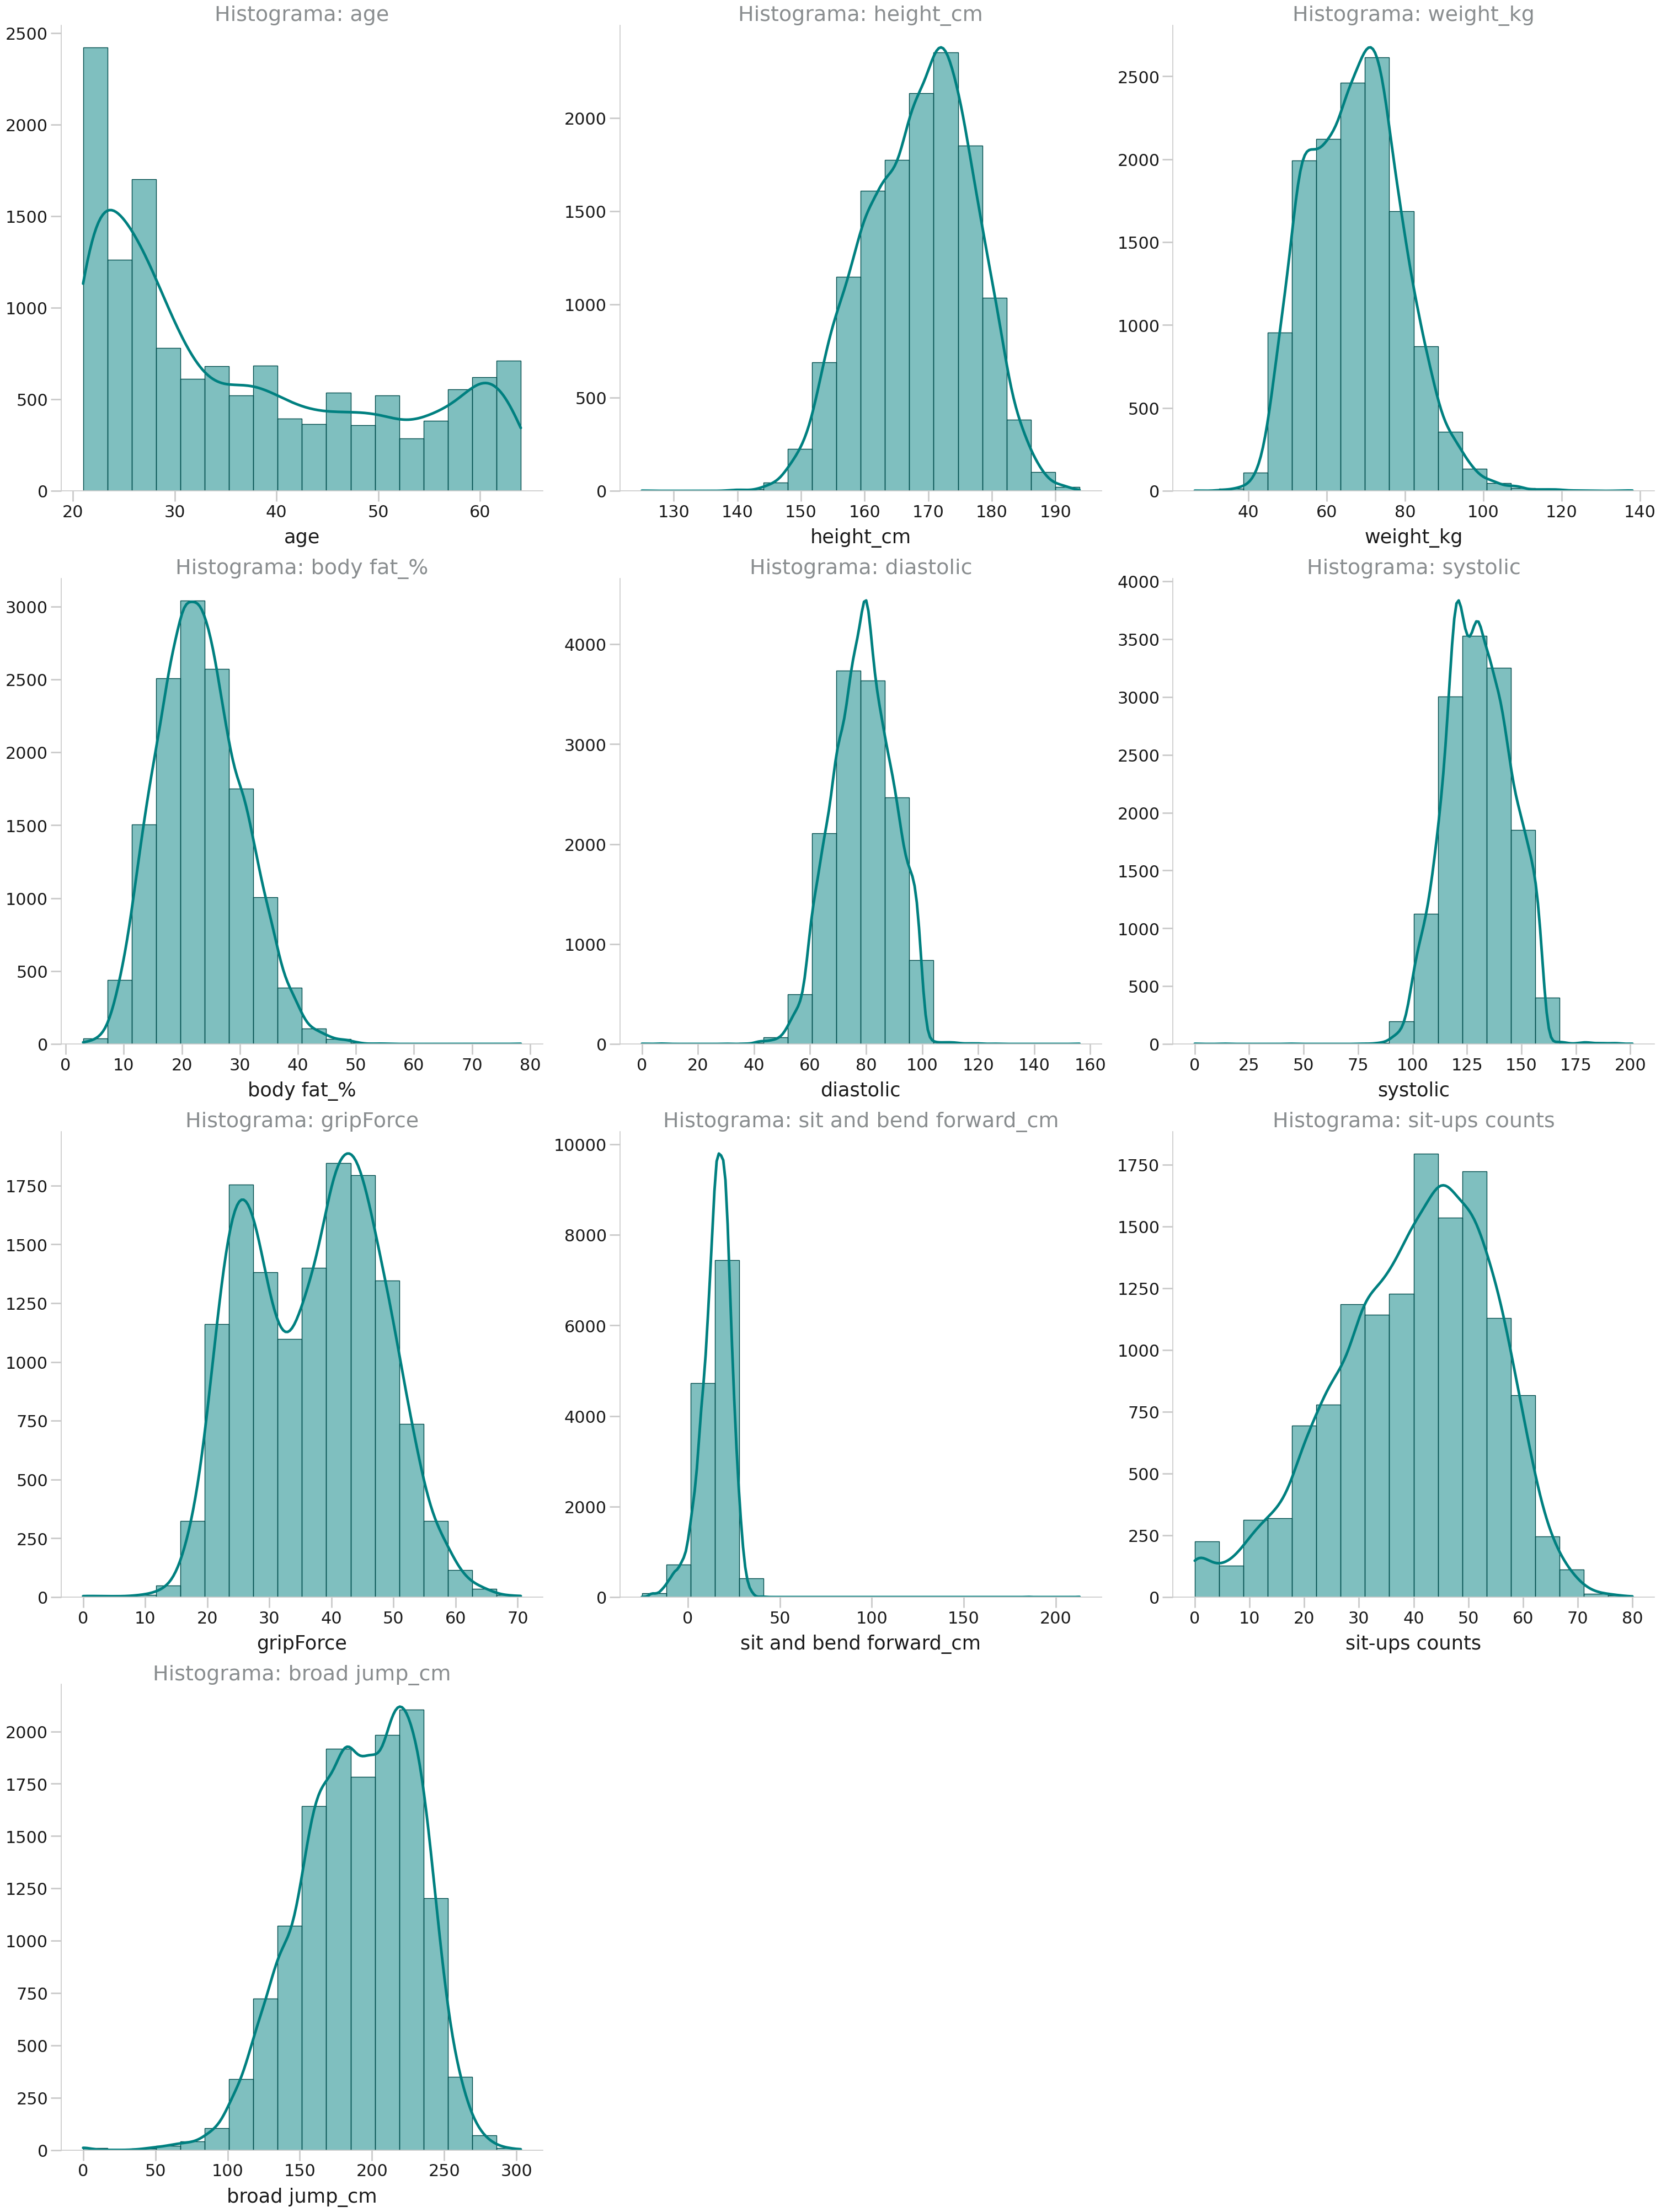

In [157]:
fig = plt.figure(constrained_layout=True, figsize=(30, 40))

gs = GridSpec(4,3, figure=fig)
 
for i in range(len(vars_num)):   
    
    # nome coluna
    x=vars_num[i]
    
    # define eixo e plota o histograma
    ax=fig.add_subplot(gs[int(i/3), i%3])
    sns.histplot(ax=ax,data=df, x=x,
                 bins=18, element= "bars",     
                 kde=True, 
                 line_kws={'linewidth':0.002*tmp._k(ax1)},
                 edgecolor=tmp.c1_forte,
                 color=tmp.c1_normal,
                )
    
    # define eixos e limites
    tmp.set_axes_2(ax,titulo="Histograma: "+x, ylabel=None, xlabel=x)
    li.muda_limites_eixo_y(ax1, frac=0.1)

    


> **Considerações**
>- Pelos gráficos acima, podemos notar que as distribuições para algumas variáveis não são simétricas, como exemplo temos 'age','grip-force', 'sit-ups counts', dentre outras. Este fato pode ter um efeito negativo no treinamento de alguns modelos preditivos. Uma alternativa para solucionar este problema consiste em aplicar transformações nos dados que modifiquem as distribuições das variáveis. Modelos com estas transformações foram considerados no desenvolvimento de [modelos preditivos](#mod_pred) para este conjunto de dados.
>- Algumas distribuições possuem caldas muito longas, como os gráficos para 'sit and bend forward_cm', 'systolic', dentre outros. Isto é um indicativo de pontos outliers. Uma análise mais precisa, visando identificar e eliminar estes pontos, foi feita na seção [Eliminando pontos outliers](#eliminOut) abaixo. 

## 5. Eliminação de pontos outliers<a id='eliminOut'></a>
[Índice](#ind)
    
A eliminação dos outliers foi feita considerando o intervalo interquartil, IQR, das variáveis contínuas. O método considera qualquer valor fora do intervalo [Q1-f.IQR; Q3+f.IQR] como um ponto outlier. Na equação anterior Q1 e Q2 são respectivamente o primeiro e o terceiro quartil e f é uma fração do intervalo IQR. Neste trabalho foi considerado f=1.5. <br>
    
Este método permite uma visualização por meio de boxplots. Seguem abaixo os boxplots das variáveis consideradas (todas as variáveis contínuas), antes das eliminações e depois das eliminações.

In [15]:
#elimina pontos outliers

df_semOut= df.copy()

#elimina linhas da df
for col in vars_num:    
        
    # calculo de IQR
    Q1 = df_semOut[col].quantile(0.25)
    Q3 = df_semOut[col].quantile(0.75)
    IQR = Q3 - Q1
   
    frac=1.5
    serieBool=(df_semOut[col]<(Q1-frac*IQR))|(df_semOut[col]>(Q3+frac*IQR))
    
    #elimina linhas fora do intervalo acima
    df_semOut=df_semOut[~serieBool]   
    

#numero de linhas eliminadas:
nLinha_elim= len(df)-len(df_semOut)
fracElim=nLinha_elim/len(df)


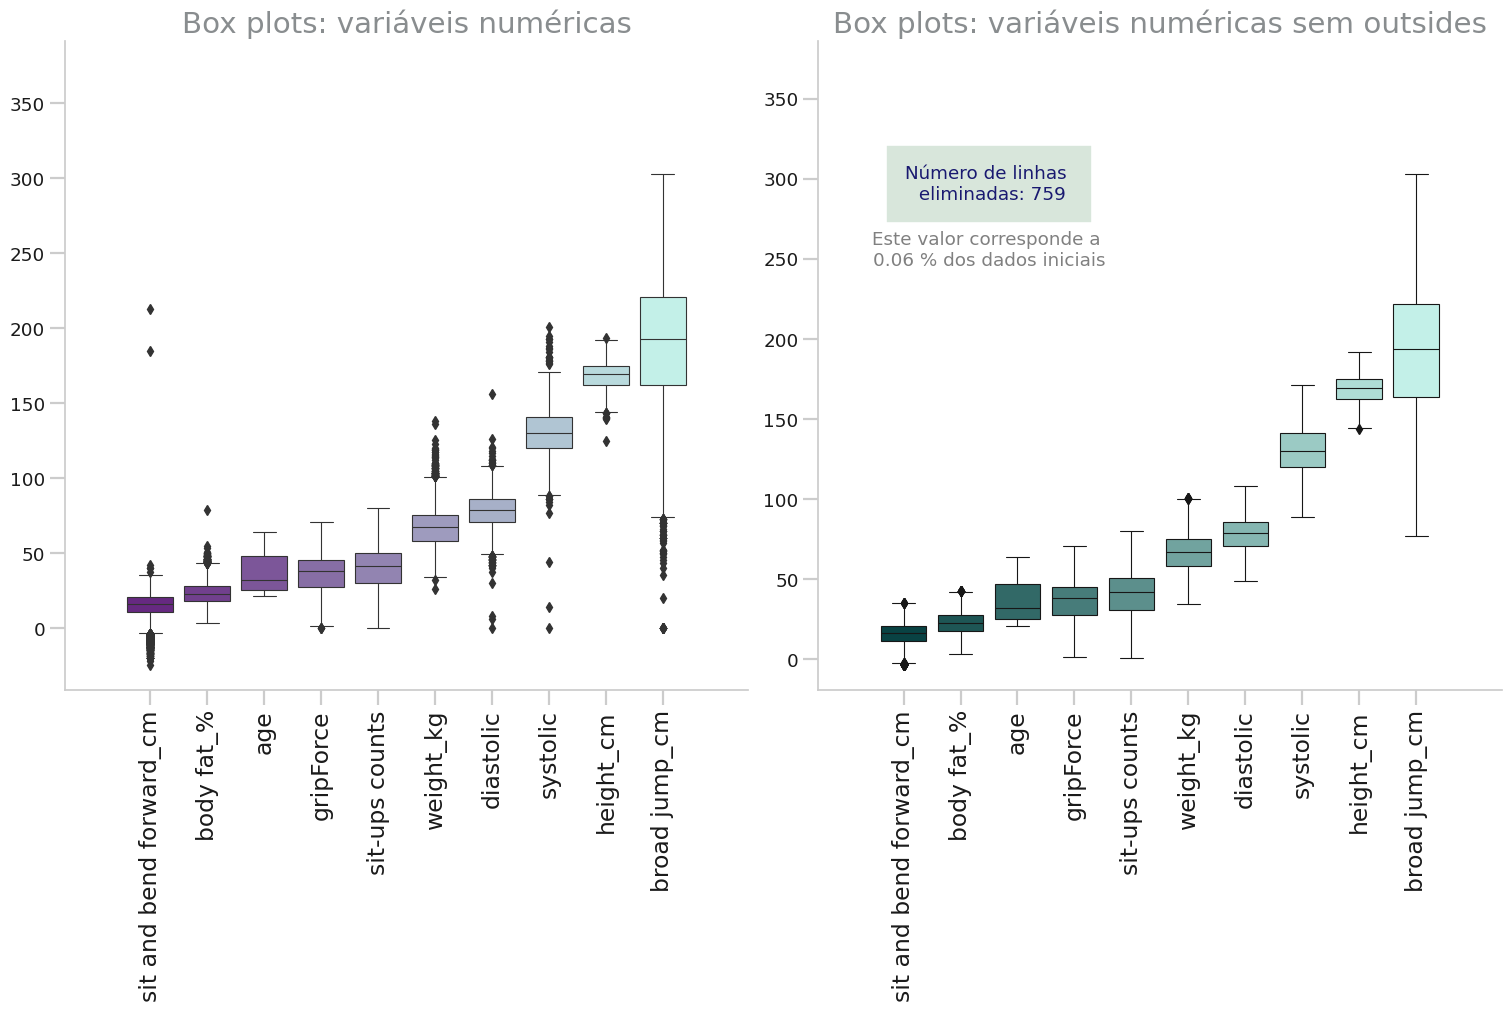

In [153]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(1,2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])


# ordena as colunas pela media
vars_sortByMean=df[vars_num].mean().sort_values().index


# --- figura 1 ---
sns.boxplot(ax=ax1, data=df[vars_sortByMean],
            palette=tmp.pmo_2(len(vars_sortByMean)),
            linewidth=0.8)
# define eixos e limites
tmp.set_axes_2(ax1, titulo='Box plots: variáveis numéricas',xlabel='',ylabel='')
li.muda_limites_eixo_x(ax1, frac=0.1, tipo_aumento=2)
li.muda_limites_eixo_y(ax1, frac=0.2, tipo_aumento=0)
# mudanças nos eixos
ax1.tick_params(axis ='x',labelrotation = 90)
ax1.tick_params(axis ='y',labelsize = 0.025*tmp._k(ax1))

       
    
# --- figura 2 ---
sns.boxplot(ax=ax2,data=df_semOut[vars_sortByMean],
            palette=tmp.pmo_1(len(vars_sortByMean)),
            linewidth=0.8)
# define eixos e limites
tmp.set_axes_2(ax2,titulo='Box plots: variáveis numéricas sem outsides',
               xlabel='',ylabel='')
li.muda_limites_eixo_x(ax2, frac=0.1, tipo_aumento=2)
li.muda_limites_eixo_y(ax2, frac=0.2, tipo_aumento=0)
# mudanças nos eixos
ax2.tick_params(axis ='x',labelrotation = 90)
ax2.tick_params(axis ='y',labelsize = 0.025*tmp._k(ax2))


# monta o texto 
texto1 = f'Número de linhas \n eliminadas: {nLinha_elim}'
texto2 = f'Este valor corresponde a \n'f'{round(fracElim,2)} % dos dados iniciais'
            
# parametros das anotações
params=dict(x_in = 0.25,
            y_in = 0.75,
            numLetra=0.025,
            boxstyle="square",
            c_FaceBox="#d8e6db",
            c_EdgeBox="#d8e6db",           
            c_LetraBox='#191970',
            c_LetraTexto='gray',
            f_textos=32)

an.anotacoes_box_texto(ax2,texto1,texto2,**params ) 

plt.show()

## 6. Testes de hipóteses<a id="hip"></a>
[Índice](#ind)
    
Os dados podem ser agrupados com relação ao sexo em M(male) e F(female). Para cada grupo podemos considerar as médias de outras variáveis, como, idade (age), altura(height_cm), peso(weight_kg), etc. O agrupamento mencionado permite uma comparação das médias das variáveis para os 2 sexos distintos. Podemos desconfiar, por exemplos, que a médias de idade entre entre os grupos de homens e mulheres (37,3 e 36,2) são aproximadamente iguais, enquanto que as médias de peso (56,6 e 73,1) são diferentes. 
    
As comparações citadas podem ser feitas com rigor estatístico por meio de testes de hipóteses. Nesta seção, realizo os testes de hipóteses para as médias de algumas variáveis, para as subpopulações de homens e mulheres.

 Na sequência mostro os valores das médias para as variáveis nos dois grupos considerados e realizo os testes de hipóteses. Os resultados são apresentados por meio de gráficos de barras com informações sobre os testes e a hipótese mais provável de ser a correta.  

### 6.1 Realização dos testes de hipóteses<a id="realiza_th"></a>

In [12]:
# agrupa por sexo e tira a média
df_group_mean=df_semOut.groupby('gender', as_index=False)\
    .agg(
        age=('age', 'mean'),
        height_cm=('height_cm', 'mean'),
        weight_kg=('weight_kg', 'mean'),
        body_fat_=('body fat_%', 'mean'),
        diastolic=('diastolic', 'mean'),
        systolic=('systolic', 'mean'),
        gripForce=('gripForce', 'mean'),
        sit_and_bend=('sit and bend forward_cm', 'mean'),
        sit_ups_counts=('sit-ups counts', 'mean'),
        broad_jump_cm=('broad jump_cm', 'mean')
        )

df_group_mean

gender        age   height_cm  weight_kg  body_fat_  diastolic    systolic  \
0      F  37.268003  160.683872  56.584394  28.020795  75.585166  123.844976   
1      M  36.150200  173.170023  73.129580  19.880073  80.640908  133.856928   

   gripForce  sit_and_bend  sit_ups_counts  broad_jump_cm  
0  26.024049     19.443877       32.080078     155.906641  
1  43.612195     14.007474       45.529765     212.835180

In [13]:
# renomeia colunas
mapcol={'body fat_%':  'body_fat_',
        'sit and bend forward_cm': 'sit_and_bend',
        'sit-ups counts': 'sit_ups_counts',
        'broad jump_cm': 'broad_jump_cm'
        }
df_renamed=df_semOut.rename(columns=mapcol)

In [142]:
# Realiza os testes

# variáveis para o teste de hipóteses
colunas_hip= [x for x in df_group_mean.columns if x != 'gender']

#nível de significância
alpha=0.05

lis_texto=[]
lis_pvalue=[]

for col in colunas_hip:    

    # seleciona os dados
    a= df_renamed[ df_renamed['gender']=='F' ][col]
    b= df_renamed[ df_renamed['gender']=='M' ][col]

    # calcula o p-valor
    pvalue = ttest_ind(a,b, equal_var=False, alternative='less').pvalue    
    
    # realiza o teste
    if(pvalue>=alpha):
        # hip. alternativa é valida
        texto=f'As médias da variável {col} para homens e mulheres '\
              f'podem ser consideradas iguais'
    else:
        # hip. nula é valida
        texto=f'As médias da variável {col} para homens e mulheres '\
              f'devem ser consideradas diferentes'
            
    # armazena os resultados
    lis_pvalue.append(pvalue)
    lis_texto.append(texto)

print("Valores p: ",lis_pvalue[0:5])

Valores p:  [0.9999942555542822, 0.0, 0.0, 1.0, 6.930961031687943e-154]


### 6.2 Visualização gráfica dos testes de hipóteses<a id="visualiza_th"></a>

In [146]:
def plot_bar_hipotese(ax,pal=0, data=df_group_mean, y='age'):   
    
    # escolhe a paleta
    if pal==0:
        palette=[tmp.c1_normal, tmp.c1_fraca]
    if pal==2:
        palette=[tmp.c2_forte, tmp.c2_fraca]
        

    # plotas as barras
    sns.barplot(ax=ax, data=data, x='gender', y=y ,
            palette=palette)
    
    # define eixos e limites
    tmp.set_axes_2(ax,titulo='age',xlabel='',ylabel='')
    li.muda_limites_eixo_x(ax, frac=0.1, tipo_aumento=2)
    li.muda_limites_eixo_y(ax, frac=0.2, tipo_aumento=0)
    
    # escreve numeros nas barras
    an.num_barras_verticais(ax, f_tam_letra=0.07, d=2)
    
    # altera eixos
    ax.spines[['left']].set_visible(False)
    ax.set_yticks([])
    ax.set_title(y, size = 0.1*tmp._k(ax))
    ax.tick_params(axis ='x',labelsize= 0.08*tmp._k(ax))
    ax.spines[['bottom']].set_color('k')
    ax.tick_params(bottom=True, color='k')

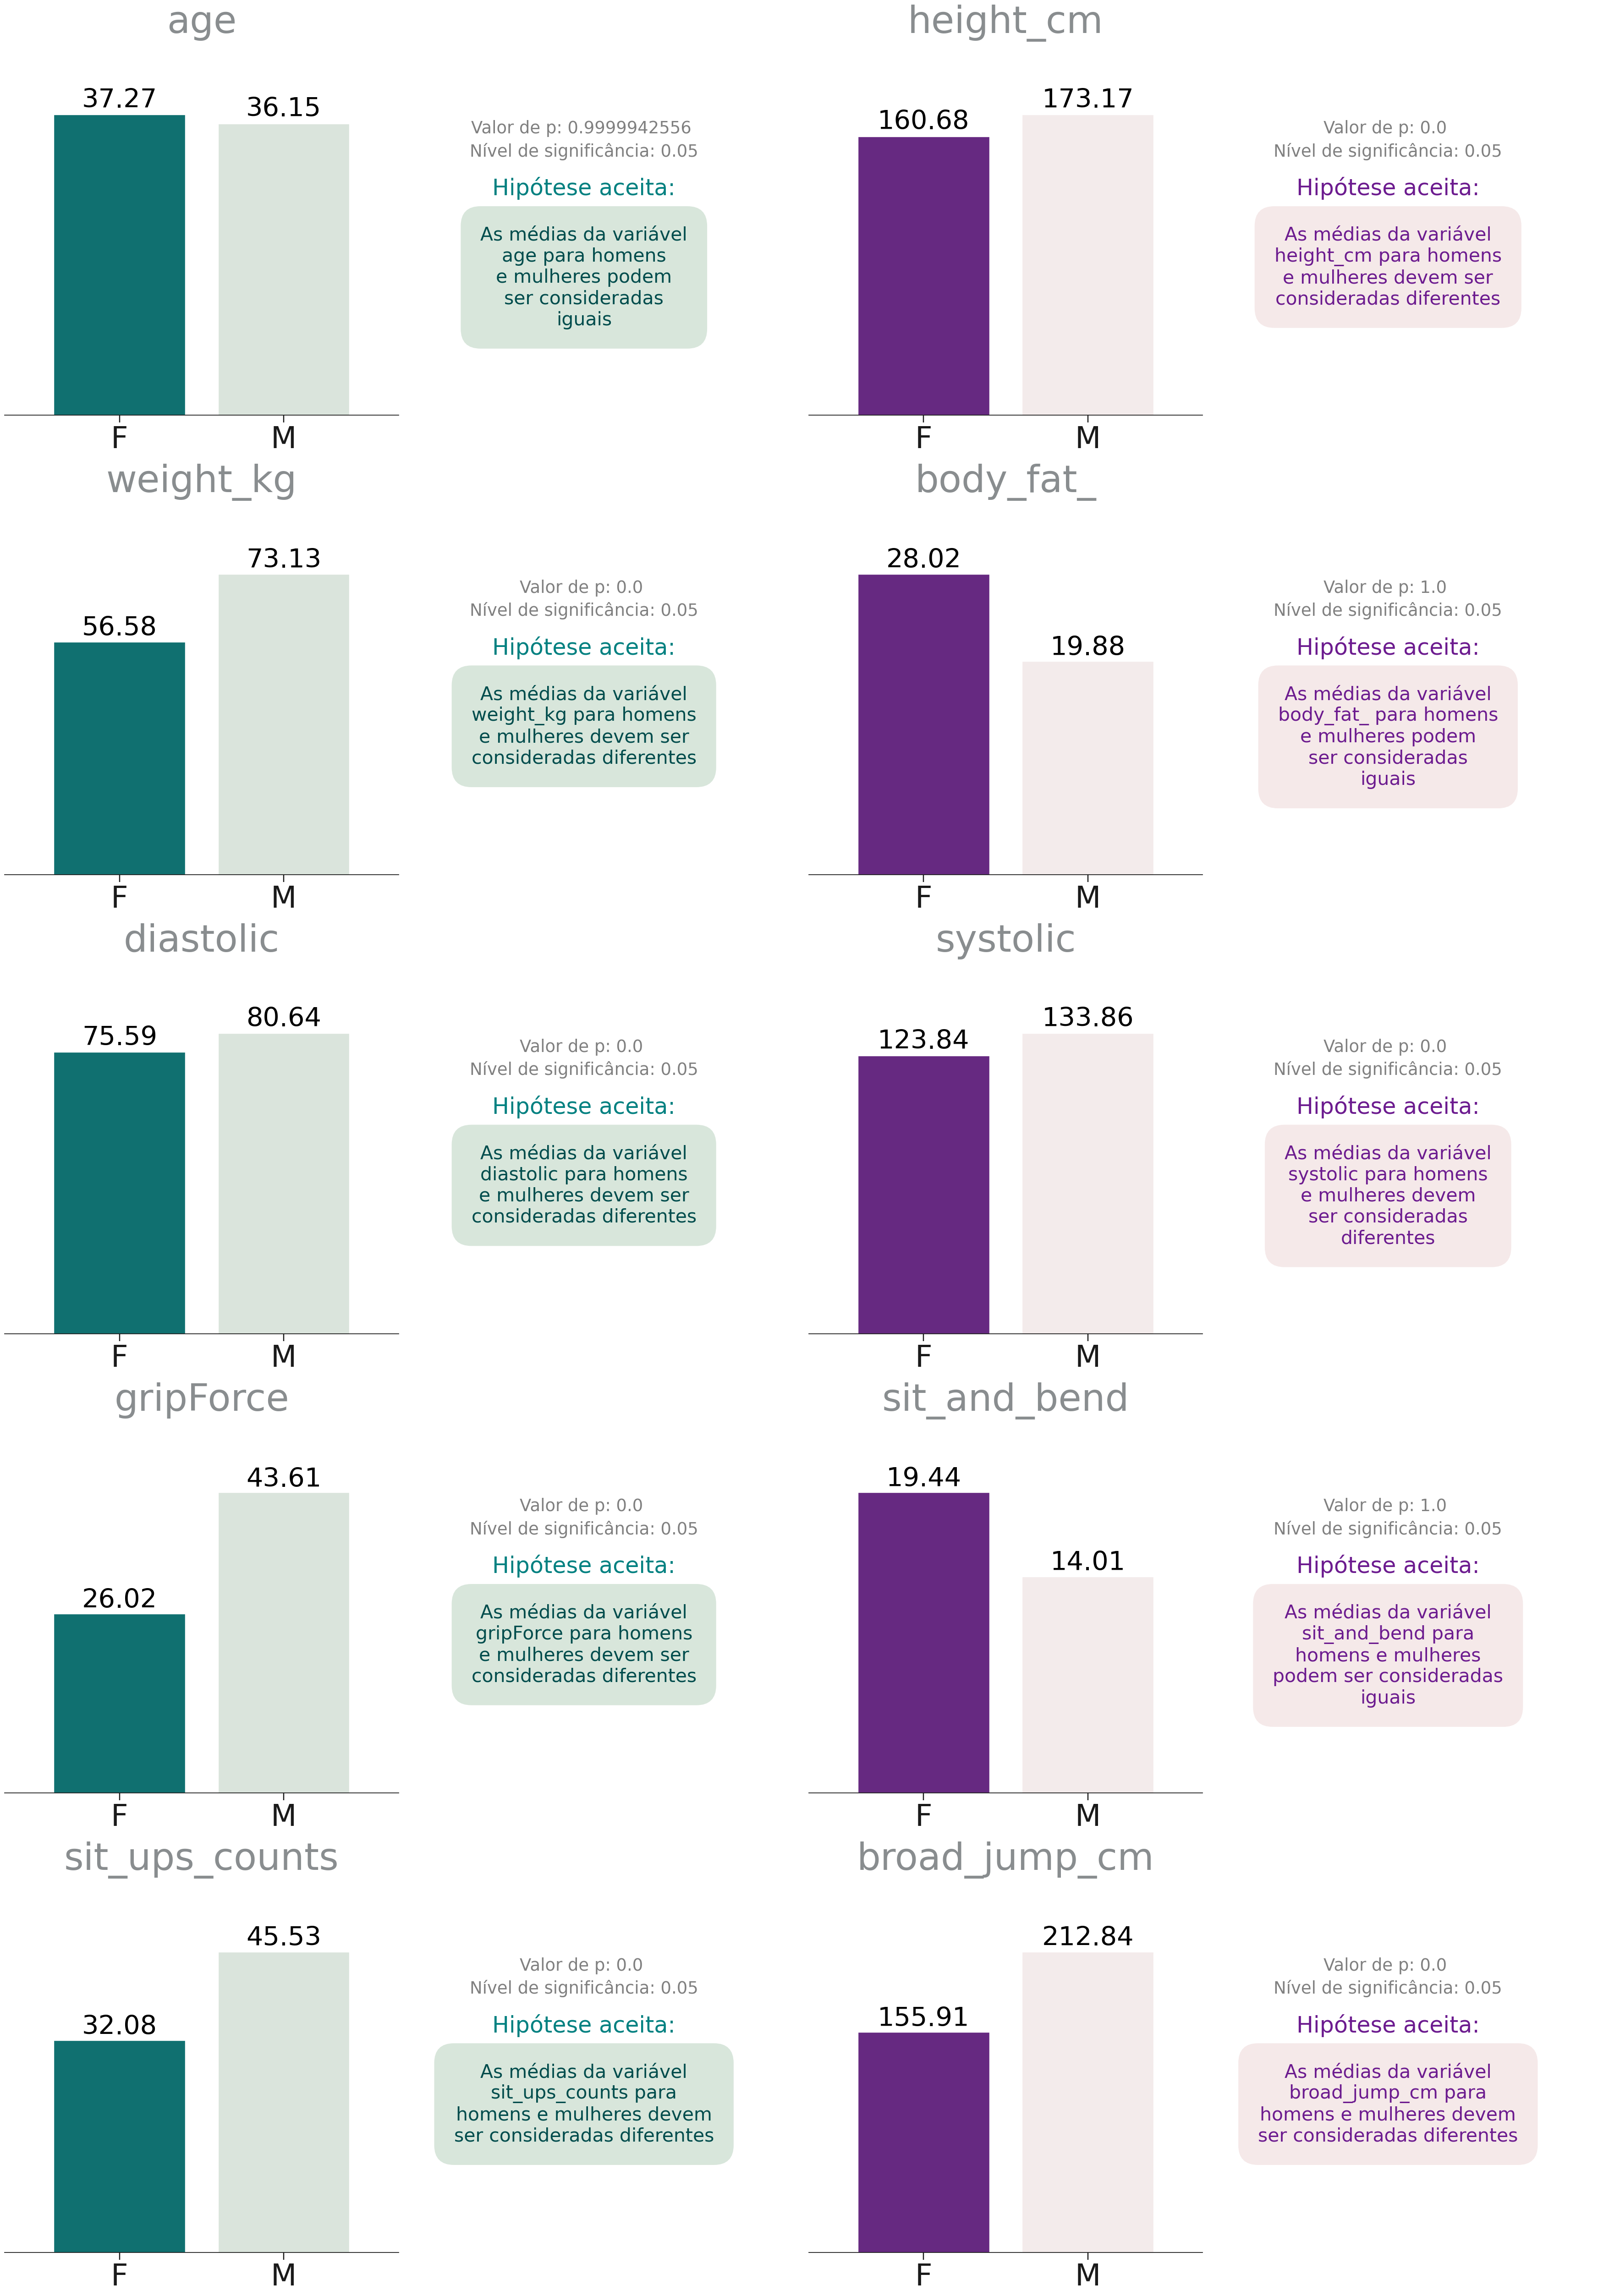

In [147]:
fig = plt.figure(constrained_layout=True, figsize=(35, 50))

gs = GridSpec(5,4, figure=fig)

contBarras=0
contTextos=0

for i in range(20):   
    
    # plota barras
    if i%2 ==0:       
        ax=fig.add_subplot(gs[int(i/4), i%4])
        
        # nome coluna    
        col=colunas_hip[contBarras]
        contBarras=contBarras+1   
        
        # para a escolha da pleta(pode ser 0 ou 2)
        pal=i%4          
        plot_bar_hipotese(ax,pal,df_group_mean, y=col)
    
    
    # plota resultados
    if i%2 ==1:
        ax=fig.add_subplot(gs[int(i/4), i%4])
        
        
        # escolhe a paleta
        if i%4==1:
            palette=dict(c_EdgeBox = tmp.c1_fraca,
                         c_FaceBox = tmp.c1_fraca,
                         c_textoAcima = tmp.c1_normal,
                         c_LetraBox = tmp.c1_forte)
        if i%4==3:
            palette=dict(c_EdgeBox = tmp.c2_fraca,
                         c_FaceBox = tmp.c2_fraca,
                         c_textoAcima = tmp.c2_forte,
                         c_LetraBox = tmp.c2_forte)
        
        # escreve os resultados
        th.escreve_res_hip(ax, round(lis_pvalue[contTextos],10),
                           alpha,
                           lis_texto[contTextos],
                           boxstyle='round',
                           **palette
                          )
        
        contTextos=contTextos+1
    


## 7. Correlações<a id='corr'></a>
[Índice](#ind)
    
Esta seção foi dividida em duas subseções: correlações entre as variáveis contínuas e correlações das variáveis contínuas com a variável alvo (variável categórica).

### 7.1 Correlações entre as variáveis contínuas<a id="corr_cont"></a>
Para as correlações entre variáveis contínuas foi feito um gráfico heat map das correlações. Neste gráfico foi possível observar a existência de correlações positivas e negativas.
    
Outra abordagem foi a construção de scatter plots para observar a forma das correlações. Para os scatterplots foram escolhidas as 3 duplas de variáveis com correlações mais positivas e as 3 duplas de variáveis com correlações mais negativas. 

In [23]:
# calcula as correlações
df_corr=df_semOut[vars_num].corr()
df_corr.head(5)

age  height_cm  weight_kg  body fat_%  diastolic  systolic  \
age         1.000000  -0.274162  -0.090772    0.229794   0.160765  0.207749   
height_cm  -0.274162   1.000000   0.752635   -0.531928   0.149897  0.222245   
weight_kg  -0.090772   0.752635   1.000000   -0.147970   0.260989  0.346913   
body fat_%  0.229794  -0.531928  -0.147970    1.000000   0.038027 -0.050600   
diastolic   0.160765   0.149897   0.260989    0.038027   1.000000  0.674768   

            gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
age         -0.161440                -0.091526       -0.539104      -0.421818  
height_cm    0.735163                -0.238948        0.501577       0.685054  
weight_kg    0.730717                -0.303141        0.342017       0.533377  
body fat_%  -0.551884                -0.023472       -0.591993      -0.673330  
diastolic    0.208256                -0.088598        0.024061       0.106072

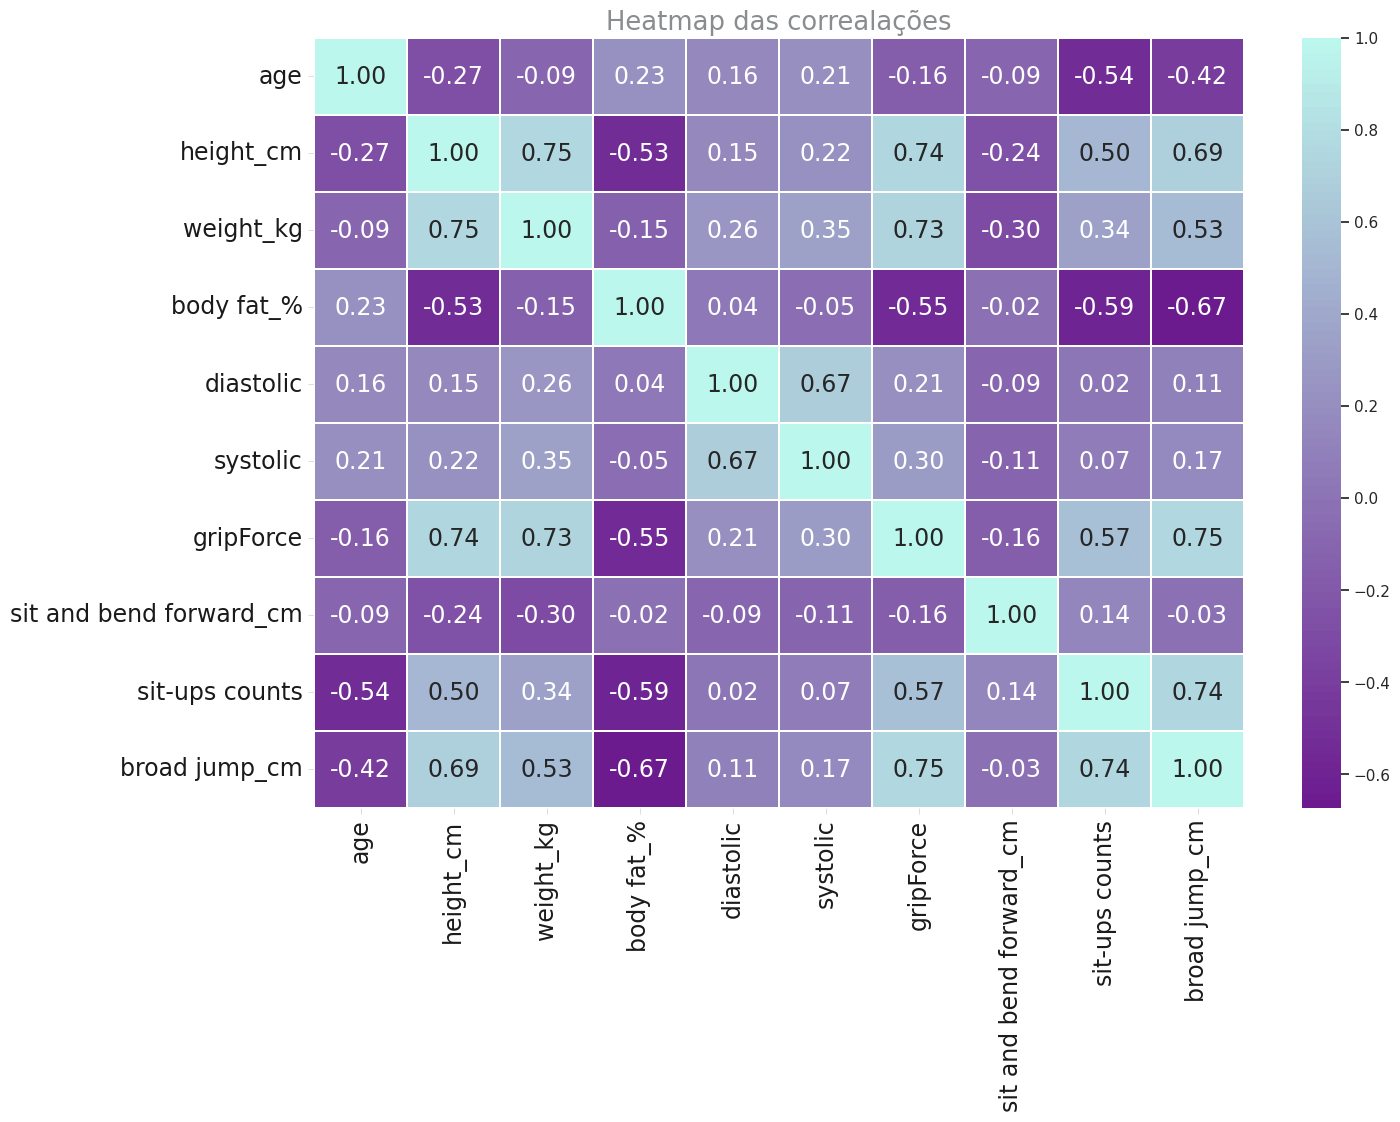

In [190]:
# plota um heatmap das corelações
fig,ax = plt.subplots(figsize=(15,10))

sns.heatmap(df_corr,
            annot=True,   #escreve os dados na figura
            fmt=".2f",
            cmap=tmp.pmo_2(100),
            linewidths=0.005, 
            annot_kws={'fontsize':'17'},
           ax=ax)

# define eixos
tmp.set_axes_1(ax, titulo="Heatmap das correalações",xlabel='', ylabel='')
ax.tick_params(labelsize=17)

plt.show()


### Scatter plots para variáveis com correlações mais positivas e com correlações mais negativas

Etapas para as seleções das variáveis:
1) Transforma o dataframe com as correlações em um dataframe no formato stack (df_stack). Isto permite identificar as maiores e menores correlações e entre quais variáveis elas acontecem

2) A partir de df_stack seleciona os pares de variáveis com as 3 maiores correlações e com as 3 menores correlações.

3) Plota os scatter plots para os pares de variáveis selecionados na etapa 2.

In [24]:
serie_stack=df_corr.stack()

# transforma serie em dataframe e ordena os valores
df_stack= pd.DataFrame(serie_stack, columns=['correlacoes'])\
                .reset_index(names=['vari1','vari2'])\
                .sort_values(by='correlacoes', ascending=False)
                

# remove correlaçoes entre meesmas variáveis
df_stack=df_stack[df_stack['correlacoes']!=1]


# --- falta remover valores repetidos ----
df_stack.head(5)

vari1           vari2  correlacoes
96  broad jump_cm       gripForce     0.754178
69      gripForce   broad jump_cm     0.754178
21      weight_kg       height_cm     0.752635
12      height_cm       weight_kg     0.752635
98  broad jump_cm  sit-ups counts     0.738134

In [27]:
# maiores e menores corelações
df_maires_corr = df_stack.iloc[[0,2,4]] 
df_menores_corr = df_stack.iloc[[-1,-2,-4]]

display("Maiores correlações",df_maires_corr)
display("Menores correlações",df_menores_corr)

'Maiores correlações'

vari1           vari2  correlacoes
96  broad jump_cm       gripForce     0.754178
21      weight_kg       height_cm     0.752635
98  broad jump_cm  sit-ups counts     0.738134

'Menores correlações'

vari1           vari2  correlacoes
39     body fat_%   broad jump_cm    -0.673330
93  broad jump_cm      body fat_%    -0.673330
38     body fat_%  sit-ups counts    -0.591993

In [164]:
df_maires_corr['correlacoes'].to_list()

[0.7541778387909054, 0.7526346675488754, 0.7381343183916222]

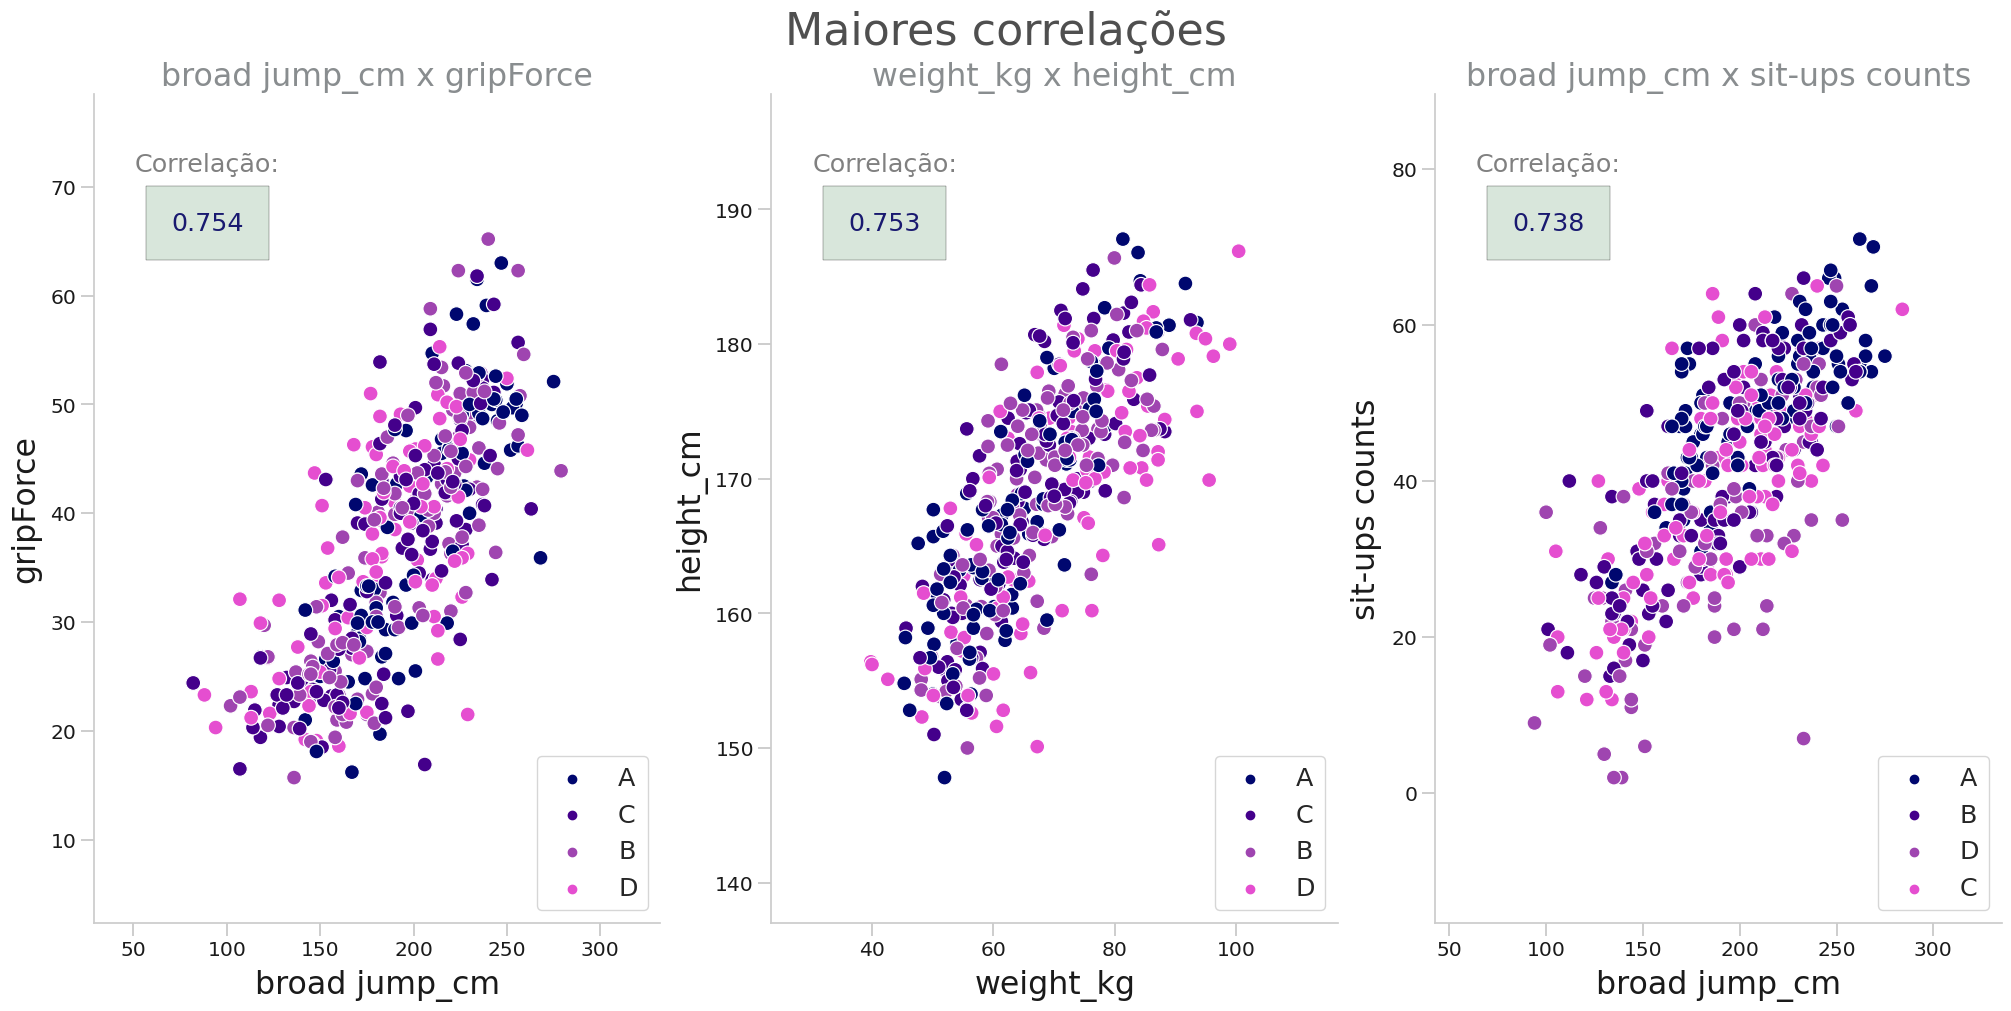

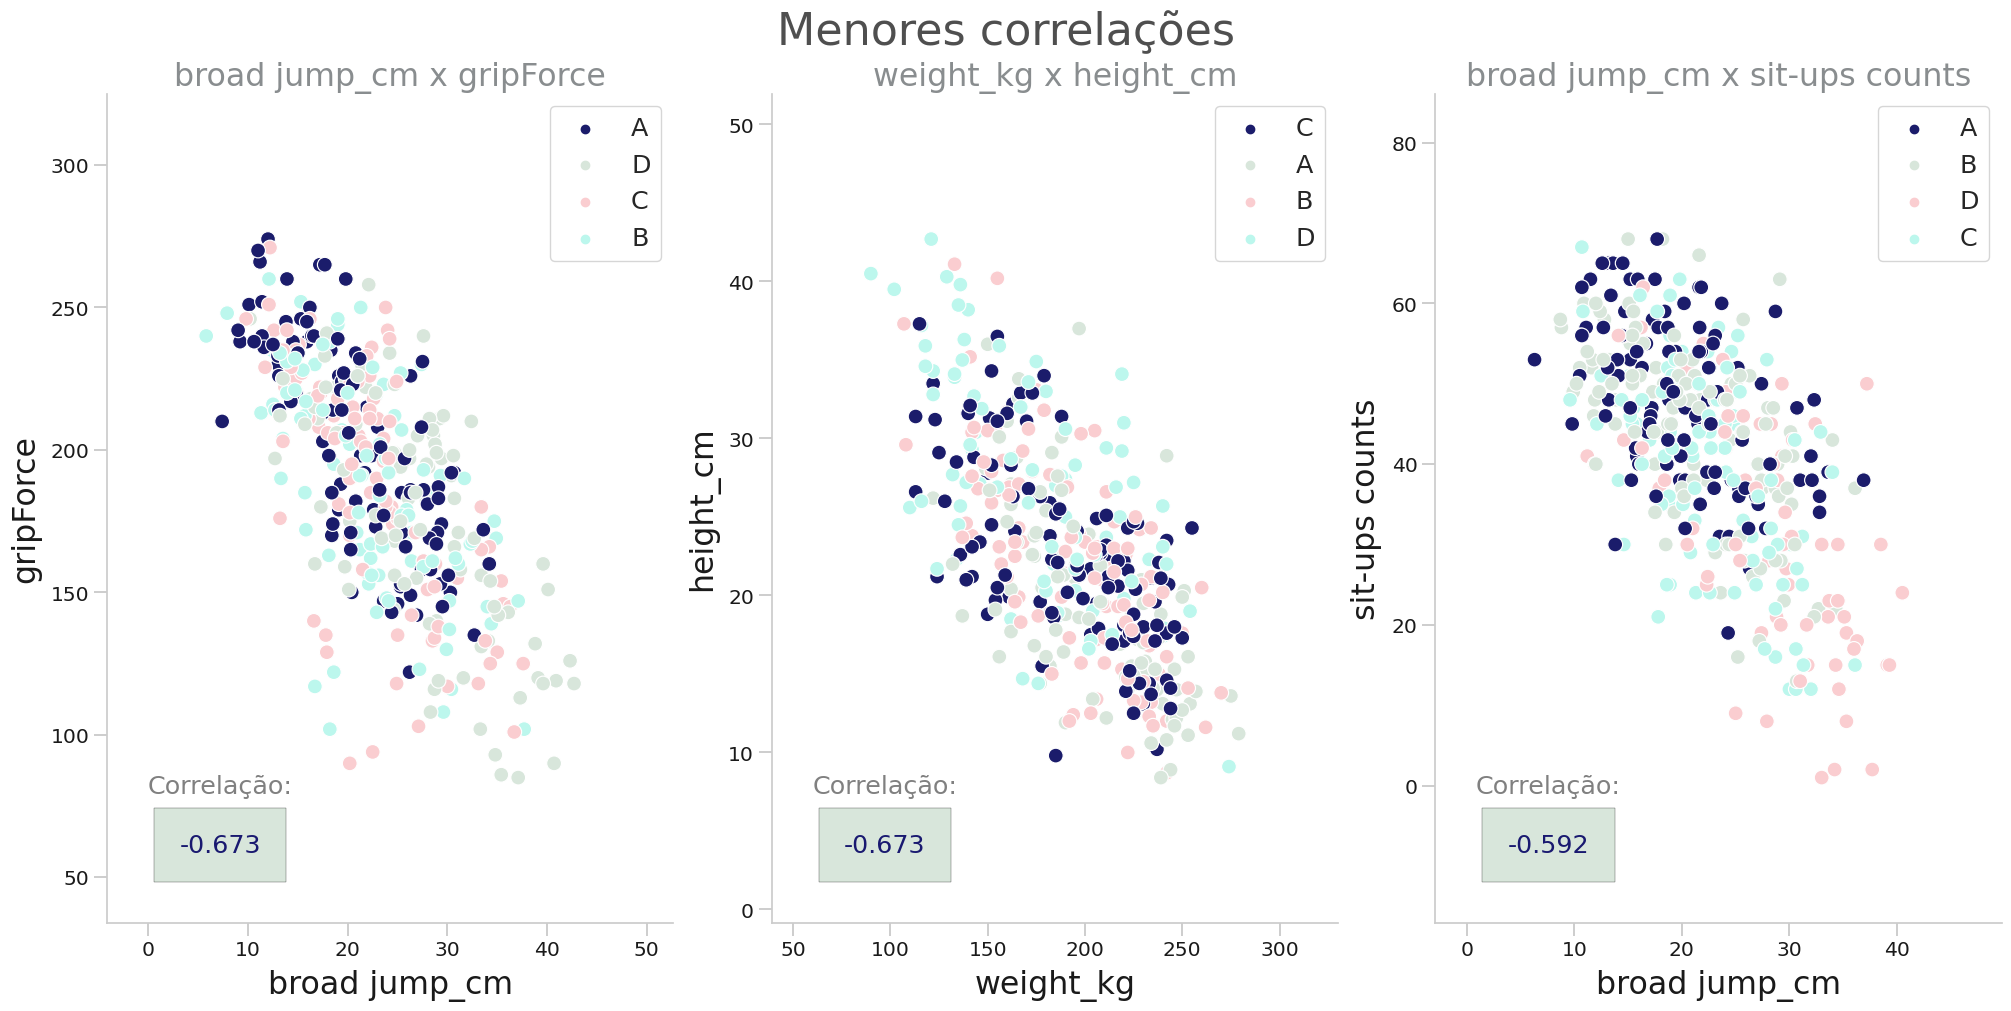

In [168]:
colMaiores_1 = df_maires_corr['vari1'].to_list()
colMaiores_2 = df_maires_corr['vari2'].to_list()
corr_maiores = df_maires_corr['correlacoes'].to_list()

colMenores_1 = df_menores_corr['vari1'].to_list()
colMenores_2 = df_menores_corr['vari2'].to_list()
corr_menores = df_menores_corr['correlacoes'].to_list()

variaveis= ([colMaiores_1,colMaiores_2, corr_maiores],
            [colMenores_1,colMenores_2, corr_menores])


for corr in [0, 1]:
    
    # 0-> maiores correlações
    # 1-> menores correlações
    
    fig = plt.figure(constrained_layout=True, figsize=(20,10))
    gs = GridSpec(1,3, figure=fig)
    
    
    for i in range(3):
        
        # paleta
        if corr==0:
            palette=tmp.pm_1[0:4]
        else:
            palette=tmp.pm_2[2:6]
            
            
        # plota o scatter plot
        ax=fig.add_subplot(gs[0, i])
        sns.scatterplot(ax=ax,
                    data=df_semOut.sample(400), 
                    x=variaveis[corr][0][i],
                    y=variaveis[corr][1][i],
                    hue='class',
                    palette=palette,
                    s=0.25*tmp._k(ax)   #tamanho dos pontos
                   )

        # define os eixos
        tmp.set_axes_2(ax, titulo=None, xlabel=None, ylabel=None)
        li.muda_limites_eixo_y(ax, frac=0.2, tipo_aumento=2)
        li.muda_limites_eixo_x(ax, frac=0.2, tipo_aumento=2)
        ax.set_xlabel(colMaiores_1[i], size = 0.05*tmp._k(ax))
        ax.set_ylabel(colMaiores_2[i], size = 0.05*tmp._k(ax))
        ax.set_title(f"{colMaiores_1[i]} x {colMaiores_2[i]}",
                     size = 0.05*tmp._k(ax))
        
       
        # anotação e legenda
        params=dict(boxstyle='square',
                    f_textos=32)
        
        if corr==0:
            an.anotacoes_texto_box(ax,texto1='Correlação:',
                        texto2=f'{round(variaveis[corr][2][i],3)}',                       
                        x_in=0.2,y_in=0.9,**params) 
            ax.legend(fontsize=0.04*tmp._k(ax), loc= 'lower right')
        else:
            an.anotacoes_texto_box(ax,texto1='Correlação:',
                        texto2=f'{round(variaveis[corr][2][i],3)}',
                        x_in=0.2,y_in=0.15,**params)                        
            ax.legend(fontsize=0.04*tmp._k(ax), loc= 'upper right')
        
    
    # subtitulos
    if corr==0:
        plt.suptitle('Maiores correlações', color="#4F4F4F",
                 size = 0.07*tmp._k(ax))
    else:
        plt.suptitle('Menores correlações', color="#4F4F4F",
                 size = 0.07*tmp._k(ax))
    
        
        
        

## 7.2 Correlações com a variável alvo: 'class'<a id="corr_alvo"></a>

Foram calculadas as correlações das variáveis contínuas com a variável alvo, 'class', que é uma variável categórica. Os resultado estão alocados no dataframe 'df_class_corr'.
    
Na sequência, foram construídas duas figuras com boxplots, sendo uma para a variável que obteve o valor mais positivo para a correlação e outra para a variável que obteve o valor mais negativo.  

In [58]:

df_factorize = df_semOut.copy()

# mapeia a variável 'class' para números interiros
df_factorize['class'] = pd.factorize(df_factorize['class'])[0]

# seleciona variáveis numericas e a 'class'
df_factorize=df_factorize[vars_num+['class']]

# correlações entre 'class' e outras variáveis
df_class_corr = df_factorize.corr()\
                    .reset_index()[['index', 'class']]\
                    .rename(columns={'index':'vari','class':'corr_class' })\
                    .sort_values(by='corr_class' , ascending=False)\
                    .drop(index=10)
    
df_class_corr.head(4)


vari  corr_class
3  body fat_%    0.217905
2   weight_kg    0.139604
4   diastolic    0.055762
5    systolic    0.036685

In [59]:
# para a correlação máxima
vari_max_corr = df_class_corr.iloc[[0]]['vari'].to_list()[0]
max_corr = df_class_corr.iloc[[0]]['corr_class'].to_list()[0]

# para a correlação minima
vari_min_corr = df_class_corr.iloc[[-1]]['vari'].to_list()[0]
min_corr = df_class_corr.iloc[[-1]]['corr_class'].to_list()[0]


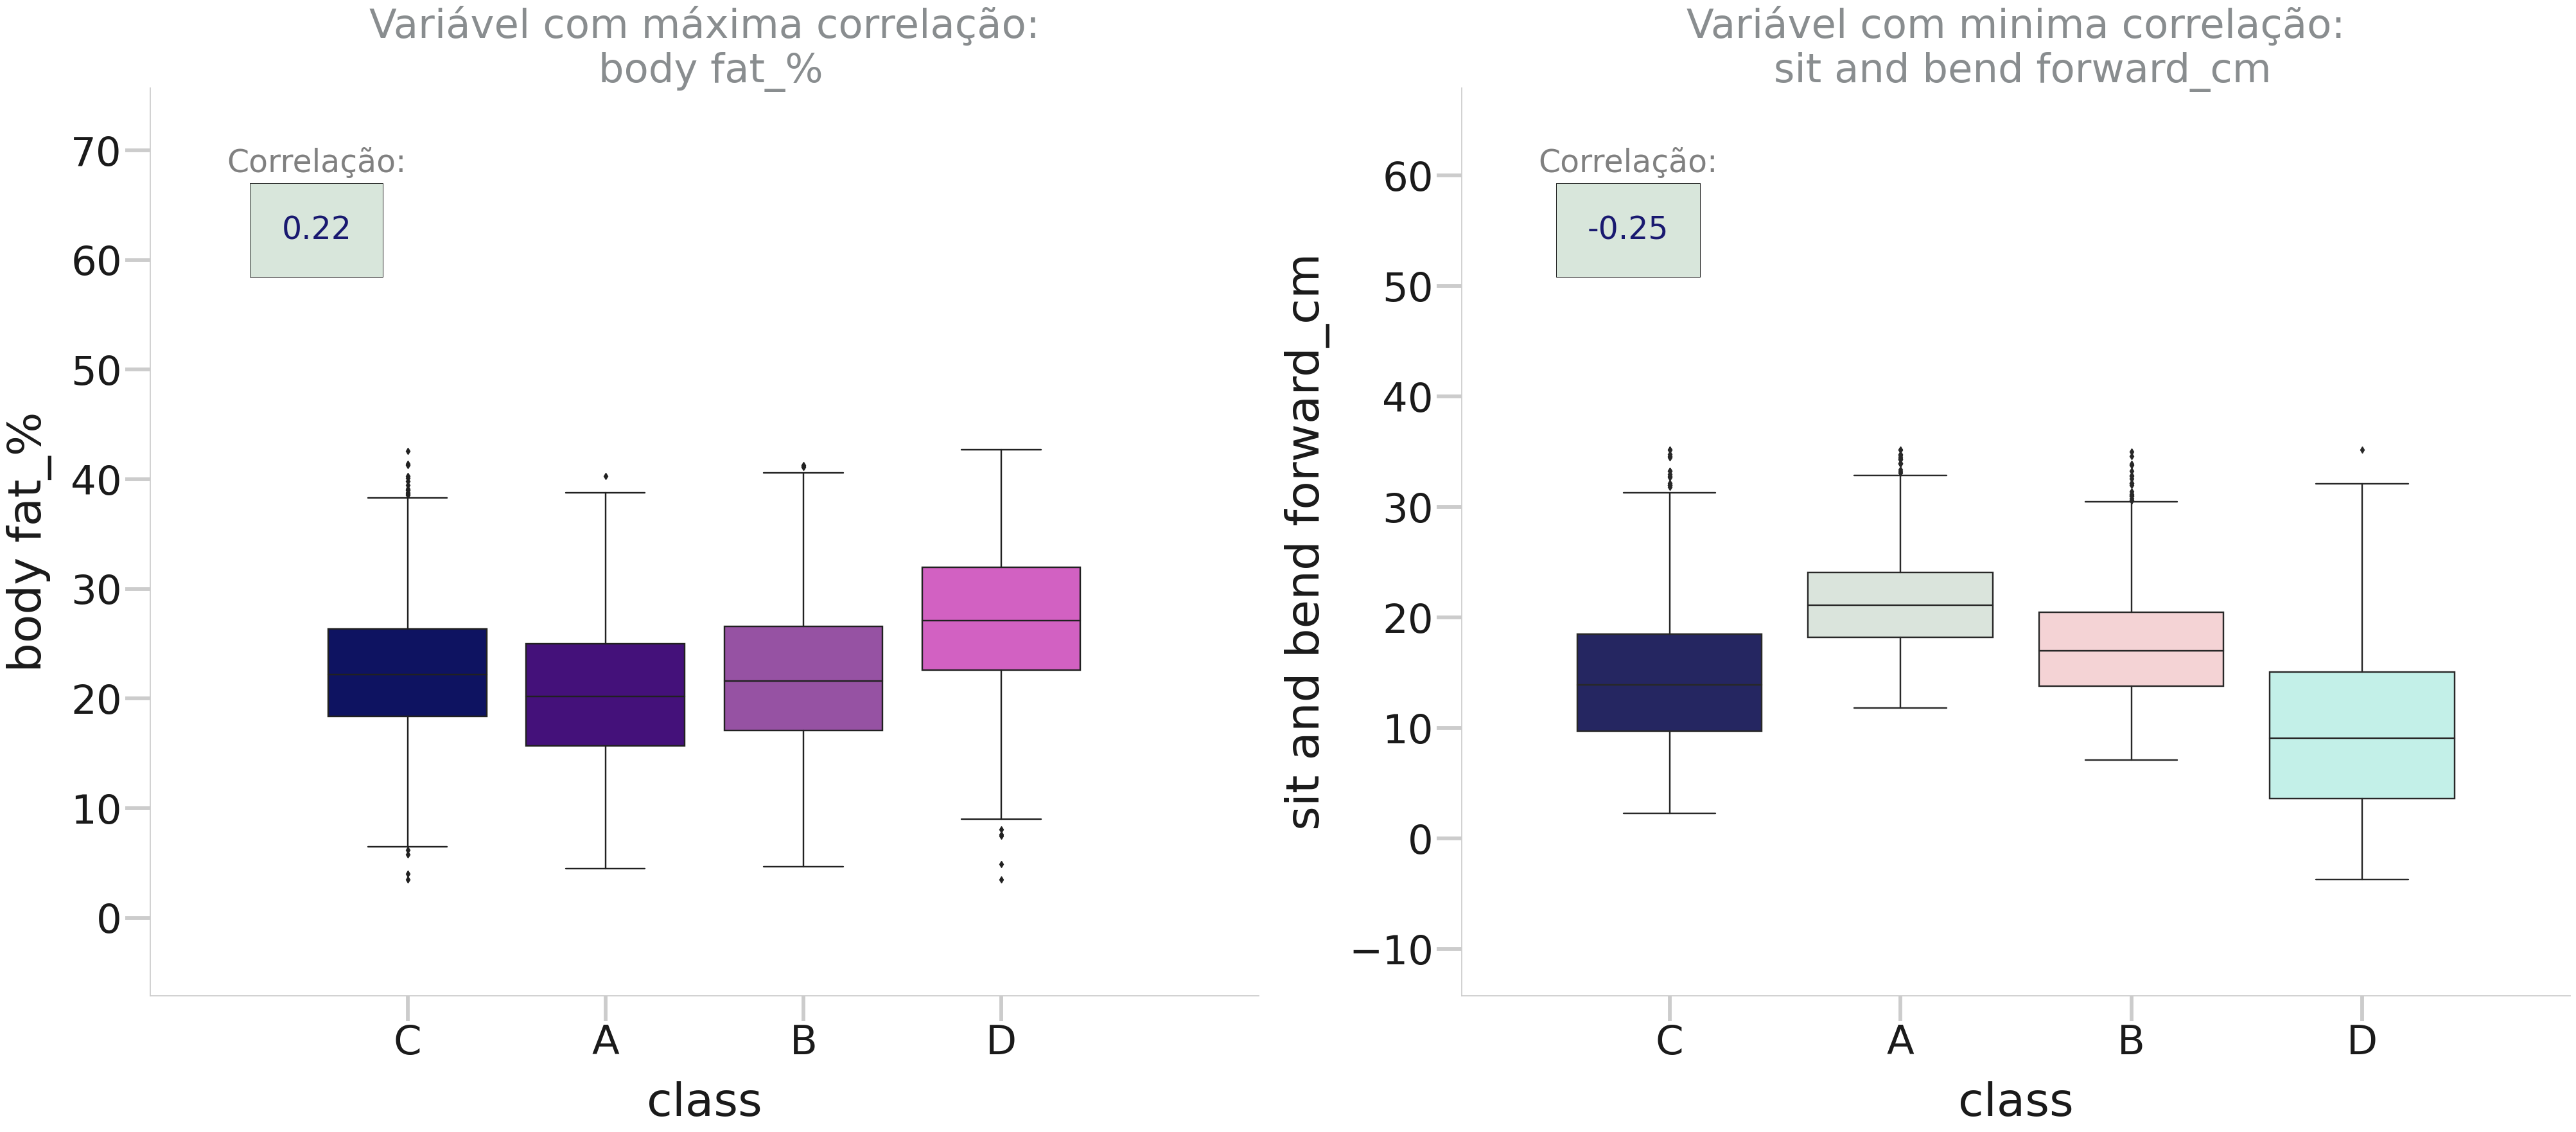

In [159]:
fig = plt.figure(constrained_layout=True, figsize=(40, 60))
#fig,ax = plt.subplots(figsize=(15,10))

gs = GridSpec(4,2, figure=fig)
ax1=fig.add_subplot(gs[0, 0])
ax2=fig.add_subplot(gs[0, 1])

# Figura 1: variável com maxima correlação com 'class'
sns.boxplot(ax=ax1, data=df_semOut, x='class', y=vari_max_corr,            
            palette=tmp.pm_1, linewidth=0.002*tmp._k(ax))

# define eixos e limites 
tmp.set_axes_2(ax1, xlabel='class', ylabel=vari_max_corr)
ax1.set_title(f'Variável com máxima correlação:\n {vari_max_corr}',
              size = 45)
li.muda_limites_eixo_y(ax1, frac=0.2, tipo_aumento=1)
li.muda_limites_eixo_y(ax1, frac=0.6, tipo_aumento=0)
li.muda_limites_eixo_x(ax1, frac=0.2, tipo_aumento=2)
an.anotacoes_texto_box(ax1,texto1='Correlação:',
                        texto2=f'{round(max_corr,2)}',
                        x_in=0.15, y_in=0.9,                                           
                        boxstyle='square',                        
                        numLetra=0.025,
                        f_textos=40) 



# Figura 2: variável com minima correlação com 'class'
sns.boxplot(ax=ax2, data=df_semOut, x='class', y=vari_min_corr,            
            palette=tmp.pm_2[2:], linewidth=0.002*tmp._k(ax))

# define eixos e limites
tmp.set_axes_2(ax2,xlabel='class', ylabel=vari_min_corr)
ax2.set_title(f'Variável com minima correlação:\n {vari_min_corr}',
              size = 45)
li.muda_limites_eixo_y(ax2, frac=0.2, tipo_aumento=1)
li.muda_limites_eixo_y(ax2, frac=0.6, tipo_aumento=0)
li.muda_limites_eixo_x(ax2, frac=0.1, tipo_aumento=2)
an.anotacoes_texto_box(ax2,texto1='Correlação:',
                        texto2=f'{round(min_corr,2)}',
                        x_in=0.15, y_in=0.9,                                 
                        boxstyle='square',                        
                        numLetra=0.025,
                        f_textos=40)

plt.show()

## 8. Modelos preditivos<a id="mod_pred"></a>
[Índice](#ind)

Nesta seção, apresento a construção de um modelo para a previsão das classes, para novos conjuntos de dados. 

De forma geral o processo de desenvolvimento de um modelo consiste em treinar e testar diversos algorítimos com pequenas alterações e possíveis transformações nos dados. Isto é feito buscando obter a configuração que leva aos melhores resultados. 

Com relação ao treinamento de modelos, é conhecido que alguns algorítimos apresentam resultados melhores quando as distribuições das variáveis preditivas são aproximadamente normais. Para o conjunto de dados estudado temos que algumas distribuições são muito distantes de uma distribuição normal, o que pode ser verificado na seção ["distribuições para as variáveis contínuas"](#distr_varnum).

A proposta para a construção de um modelo para este dataset foi transformar os dados, visando obter distribuições mais próximas da normal e investigar o efeito destas transformações em alguns algorítimos conhecidos.

Com este objetivo foram testados os algorítimos:
- Decision tree
- Random forest
- K nearest neighbour
- SVM com kernel rbf
- SVM com kernel polinomial de grau 3

Considerando as seguintes transformações nos dados:
- dados sem transformação
- transformação Yeo Johnson
- transformação quantile
- transformação standard

O trabalho foi organizado da seguinte forma:

1) O treinamento dos modelos foi feito em um segundo notebook, chamado "2_treinamento_dos_modelos.ipynb", que se encontra na pasta raiz deste projeto. O notebook em questão contém o treinamento e testes dos modelos. Neste notebook também estão  informações mais detalhadas destes processos, que foram feitos considerando ajustes de hiperparâmetros e cross validation.
    
2) Ao rodar os código do notebook  “2_treinamento_dos_modelos.ipynb" é gerado o arquivo "metricas_modelos.csv" que foi armazenado na pasta "dados". Este arquivo contém os resultados da métrica "accouracy" para todos os modelos treinados. A análise deste arquivos é feita detalhadamente no notebook atual e será apresentada na sequência. Esta análise permitiu identificar o melhor modelo dentre todos os testados.
    

    

### 8.1 Demonstração das transformações<a id="trasf"></a>
[Índice](#ind)

Segue abaixo, uma exemplificação de como as transformações consideradas nos treinamentos dos modelos alteram os dados. Para visualizar o efeito destas transformações, selecionei  3 variáveis ( "age", "gripForce" e "sit-ups counts"), cujas distribuições são distantes de distribuições normais. Para cada variável selecionada, plotei os histogramas dos dados nas seguintes situações:    
- Sem tranformação nos dados
- Com a transformação "Yeo Johnson"
- Com a transformação "quantil"
- Com a transformação "standard sacaler"
    

Os histogramas são mostrados abaixo e permitem comparar os efeitos das diferentes transformações.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer


In [19]:

# lista com transformações
tranforms= [ ('Sem transformação', None),
            ('quantil', QuantileTransformer(output_distribution="normal")),
            ('Yeo-Johoson', PowerTransformer(method="yeo-johnson")),
            ('Standard Scaler', StandardScaler()),            
           ]


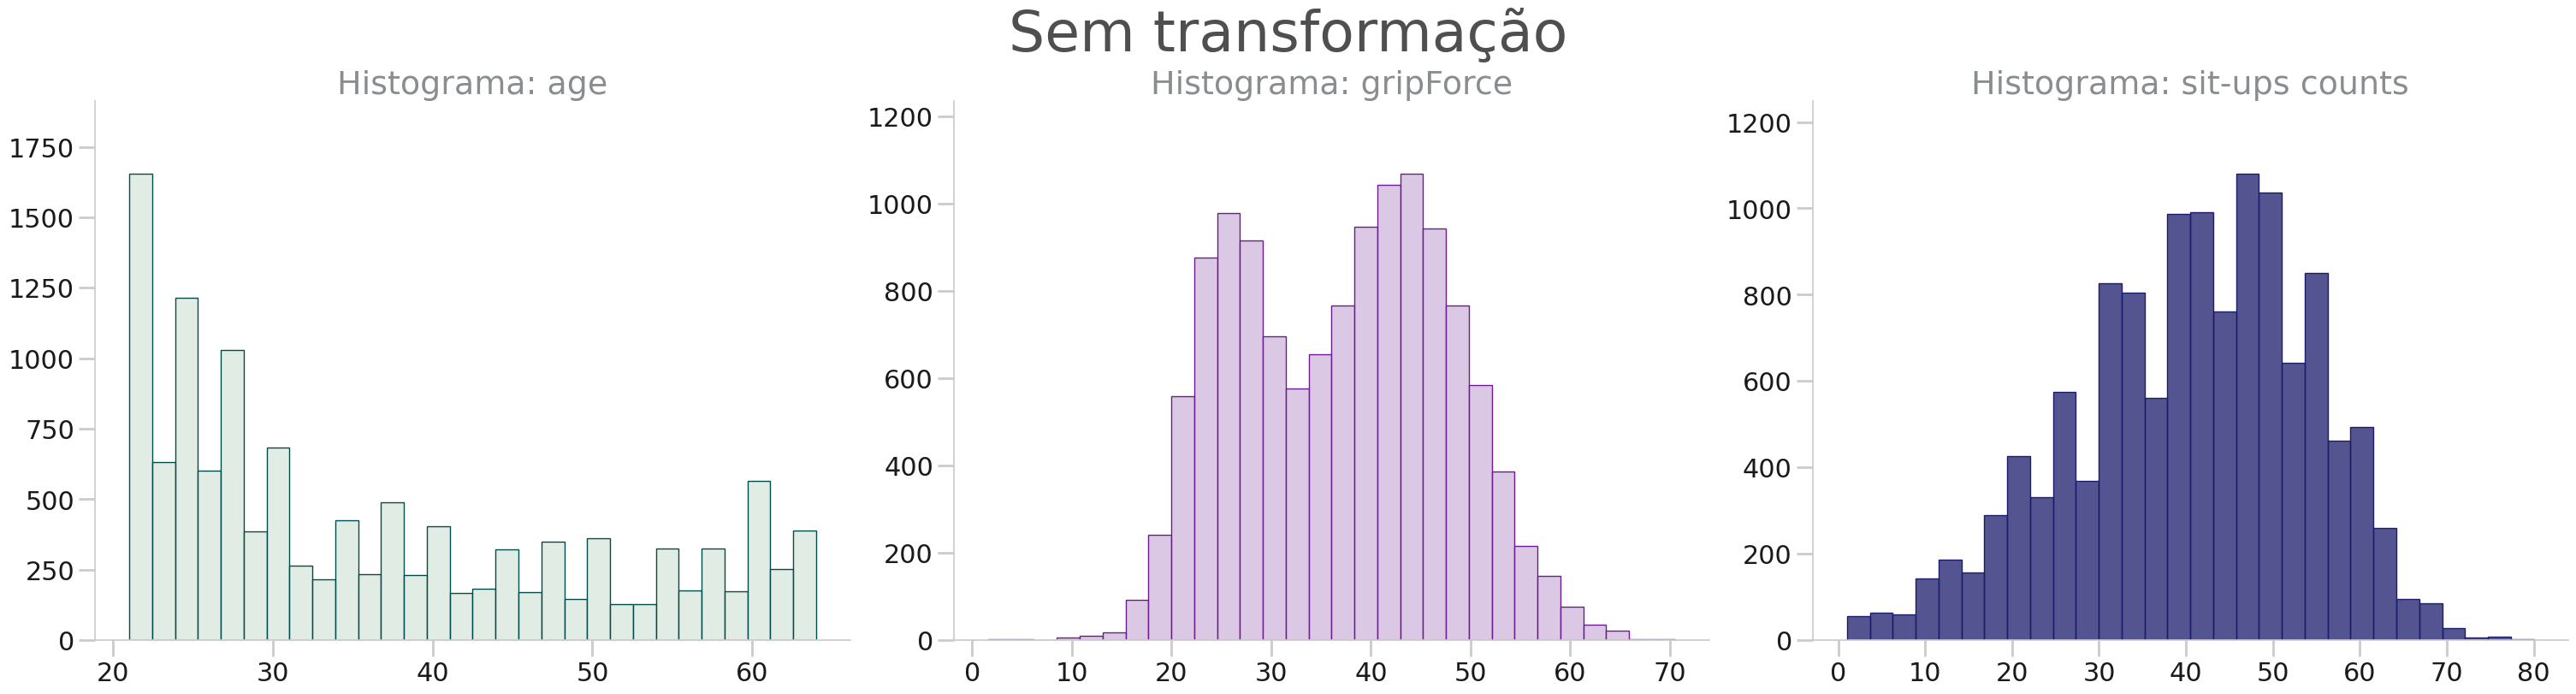

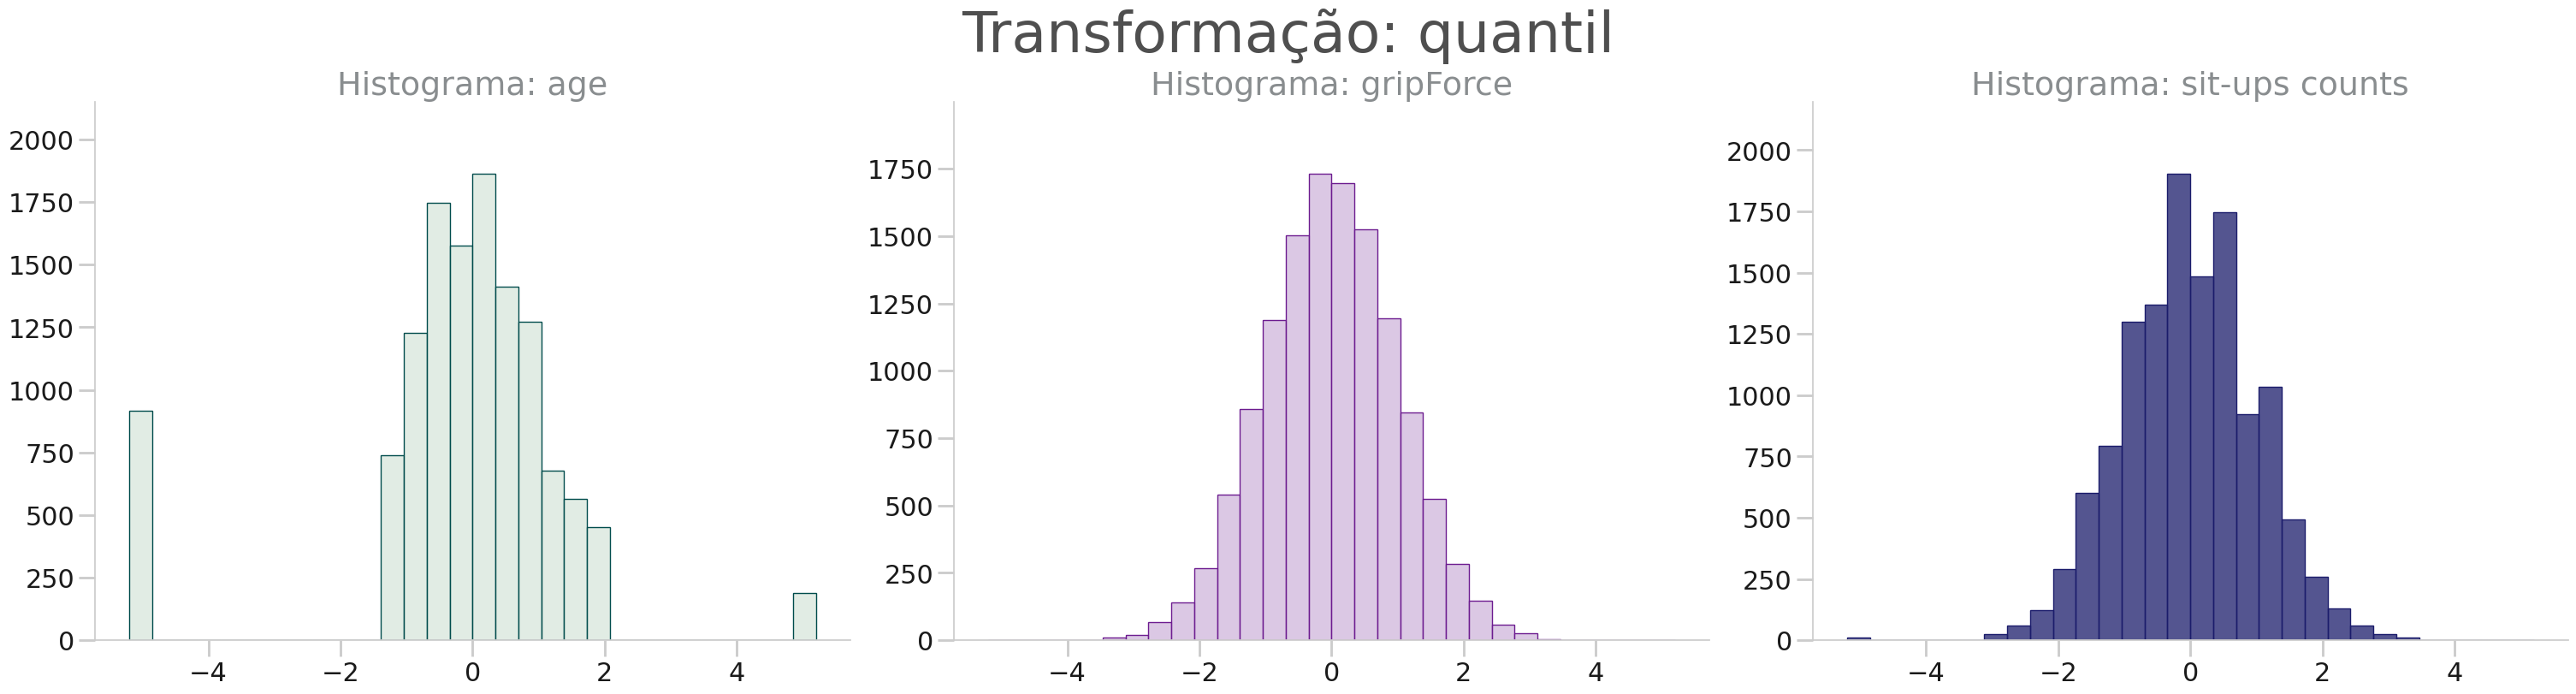

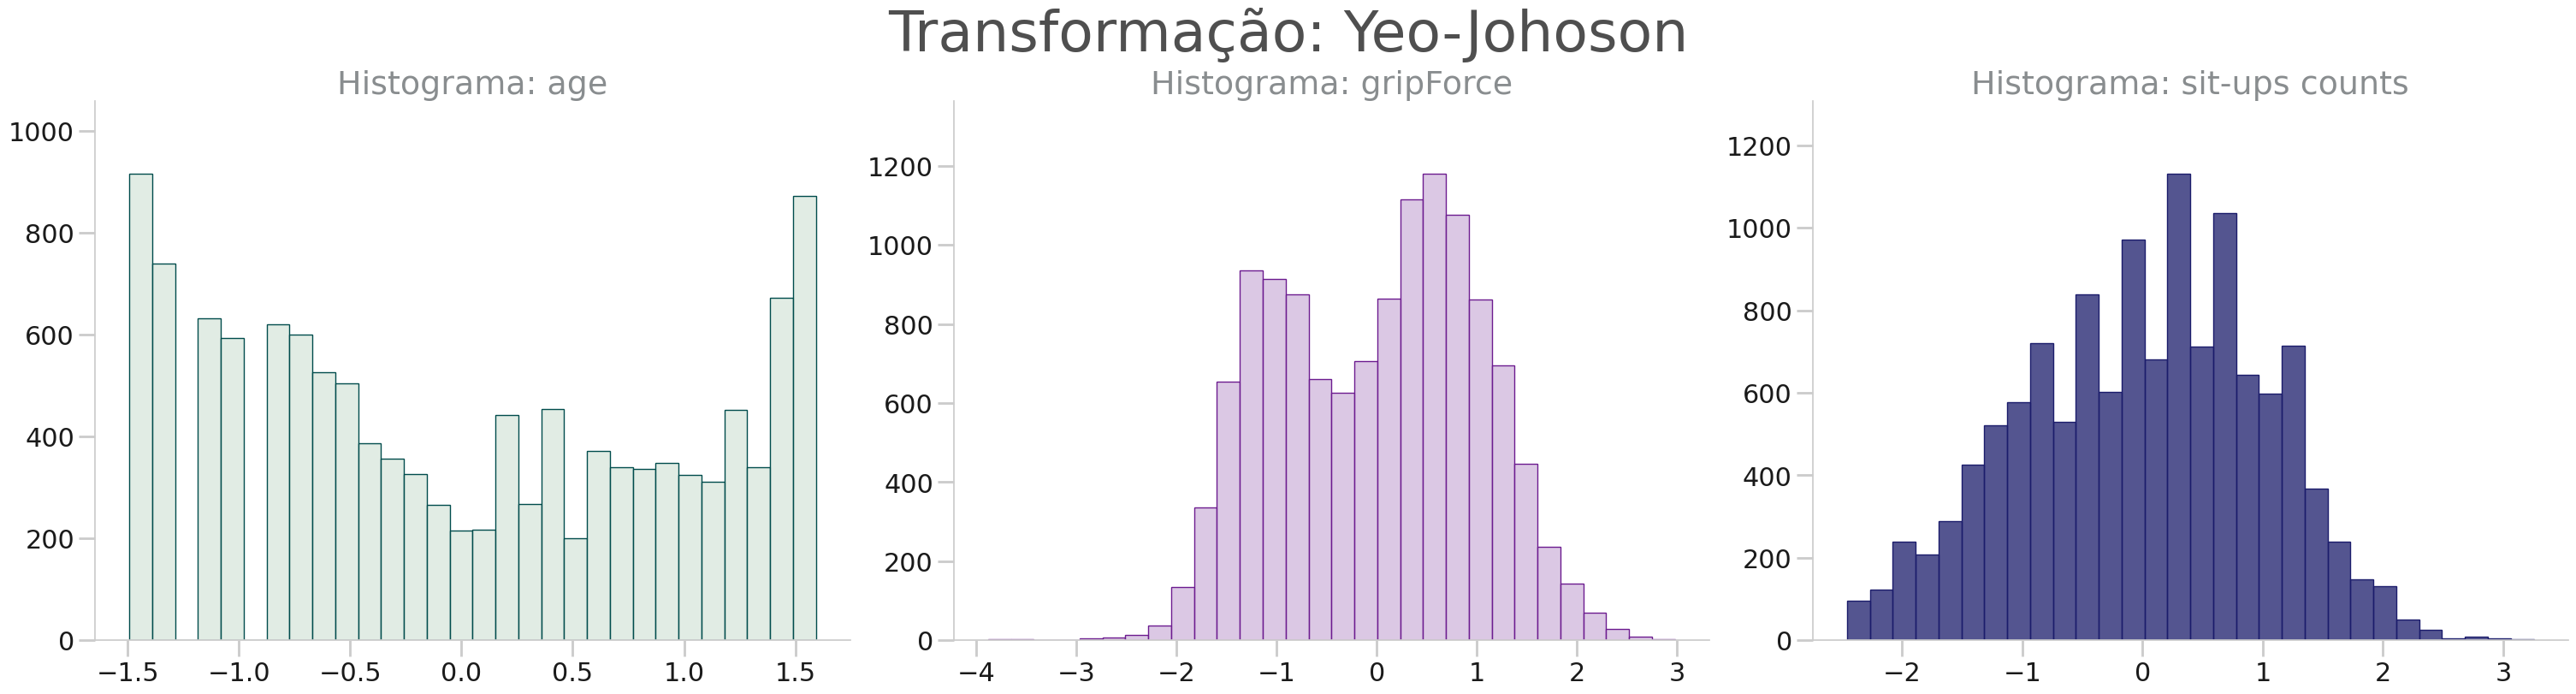

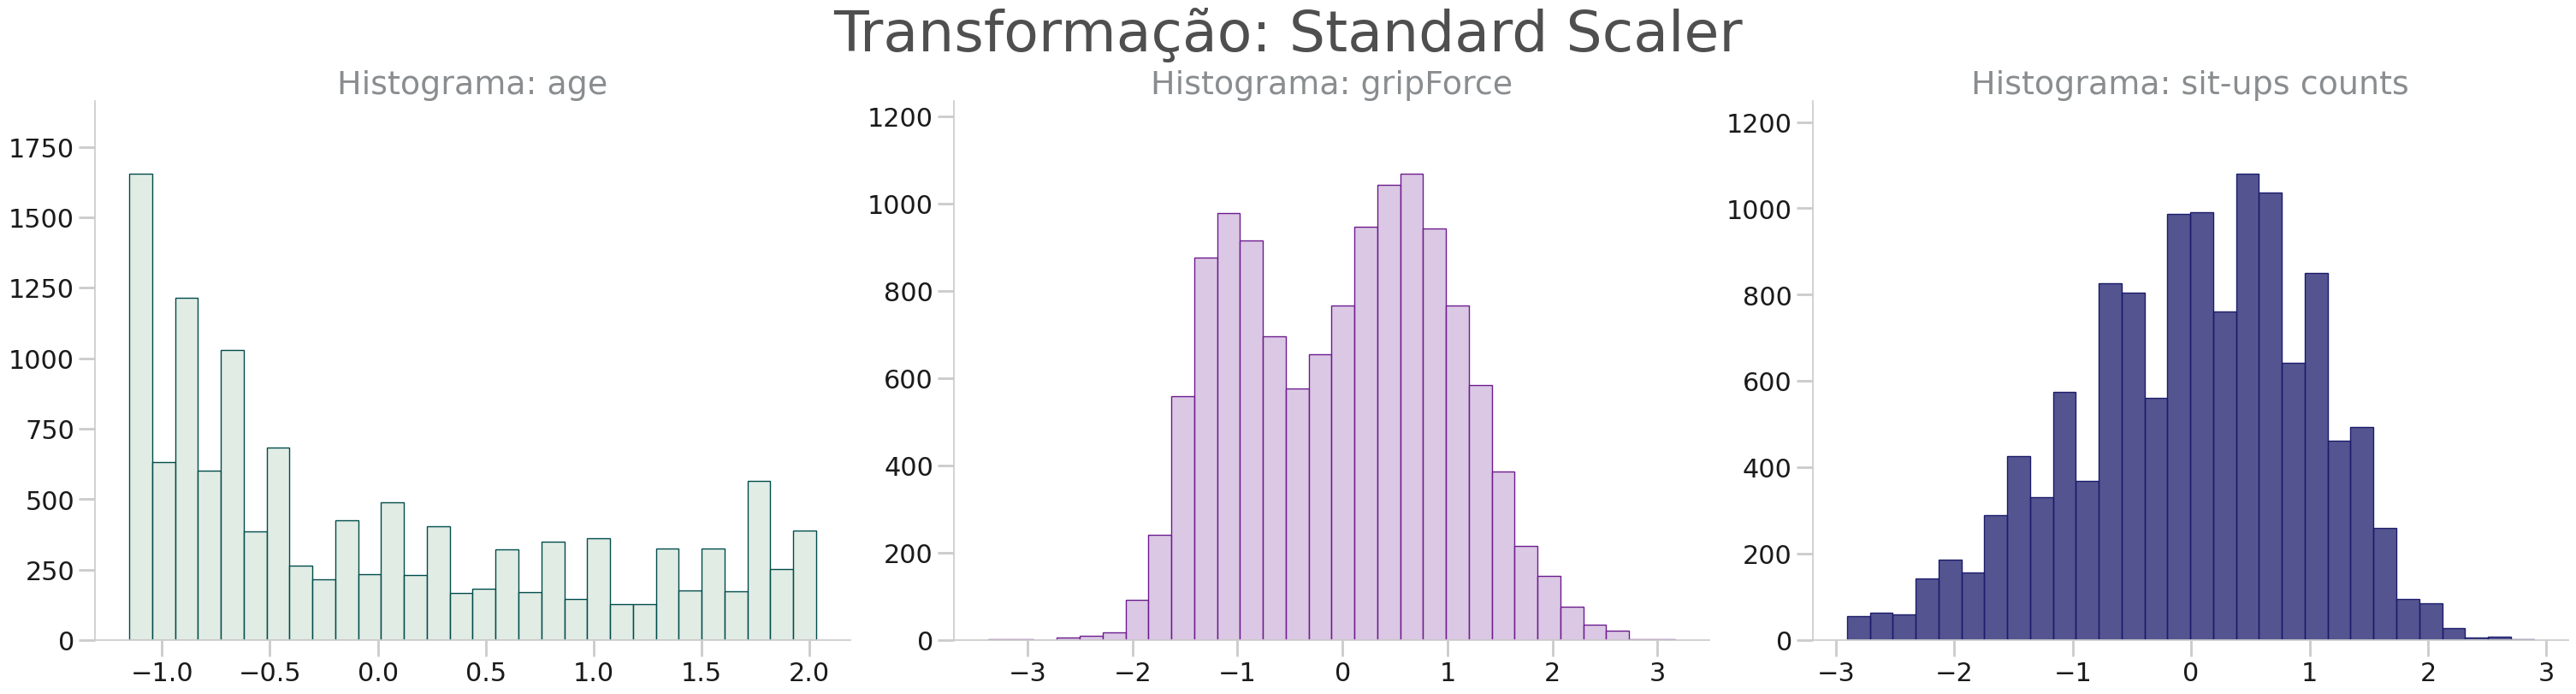

In [40]:
# colunas selecionadas
cols=['age', 'gripForce', 'sit-ups counts']

# lista com transformações
tranforms= [('Sem transformação', None),
            ('Transformação: quantil', QuantileTransformer(output_distribution="normal")),
            ('Transformação: Yeo-Johoson', PowerTransformer(method="yeo-johnson")),
            ('Transformação: Standard Scaler', StandardScaler()),            
           ]

for tranf in tranforms:  
    
    fig = plt.figure(constrained_layout=True, figsize=(30, 8))
    gs = GridSpec(1,3, figure=fig)    
    cont=0
    
    for col in cols:   
    
        # coluna em formato necessario para a tranf.
        X =df_semOut[col].values.reshape(-1, 1)
        
        if tranf[1]!=None:
            X=tranf[1].fit_transform(X)

        # retorna o formato original
        X = X.reshape(1, -1)[0]
    
        
        # cria o eixo        
        ax=fig.add_subplot(gs[0, cont])
        
        # define cor
        if cont==0:
            edgecolor=tmp.c1_forte
            color=tmp.c1_fraca
        elif cont==1:
            edgecolor=tmp.c2_forte
            color=tmp.c2_normal           
        elif cont==2:
            edgecolor=tmp.c3_forte,
            color=tmp.c3_normal
        
        
        sns.histplot(ax=ax,data=X, 
                     bins=30,
                     element= "bars",                     
                     line_kws={'linewidth':0.005*tmp._k(ax)},
                     edgecolor=edgecolor,
                     color=color
                    )
    
        # define eixos e limites
        tmp.set_axes_2(ax,titulo="Histograma: "+col, ylabel=None, xlabel=None)
        li.muda_limites_eixo_y(ax, frac=0.1)               
        
        cont=cont+1
    

    # mostra as figuras
    plt.suptitle(tranf[0], color="#4F4F4F", size = 0.07*tmp._k(ax))
    plt.show()
    
    

### 8.2 Análise dos resultados dos modelos <a id="ana_modelos"></a>
[Índice](#ind)

Como mencionado no início desta seção, os treinamentos e testes dos modelos foram feitos em um arquivo separado que geraram dados para a métrica 'accouracy', para cada modelo treinado. Apresento aqui a análise destes dados, cujo objetivo foi escolher o melhor modelo dentre todos os treinados. A sequência para esta análise é dada por:
    
1) Como primeira etapa temos a leitura do arquivo "metricas_modelos.csv" com os dados gerados pelo treinamento e teste dos modelos
2) Na segunda etapa o dataframe com os dados é reescrito em um formado que torna possível organizar os modelos por ordem crescente da métrica 'accouracy'. O resultado é armazenado no dataframe 'df_reescrito'
3) A terceira etapa consiste em plotar um gráfico com os modelos em ordem crescente da métrica. Por meio deste gráfico, podemos decidir qual modelo deve ser considerado em uma aplicação.

In [176]:
# importa os dados
current_path = os.getcwd()
path_dados=Path(current_path)/"dados"
df_metricas=pd.read_csv(path_dados/"metricas_modelos.csv")
df_metricas

modelos  sem_transformacao  yeo_johnson  quantile  standard
0       decisionTree           0.651493     0.651493  0.652239  0.651493
1       randomForest           0.727612     0.729851  0.729851  0.732836
2  kNearestNeighbour           0.579851     0.620896  0.622388  0.626119
3            rbf_SVM           0.471642     0.535821  0.505224  0.530597
4          poly3_SVM           0.311194     0.362687  0.336567  0.375373

In [182]:
# reescreve os dados como colunas:  métrica, modelos, transformação

# reescreve para a coluna 'sem_transformacao'
col='sem_transformacao'

df_reescrito = df_metricas[[col, 'modelos']].rename(columns={col:'metricas'})
df_reescrito ['transformacao']=5*[col]


# reescreve para as demais colunas
for col in ['yeo_johnson', 'quantile', 'standard']:
    
    df_aux=df_metricas[[col, 'modelos']].rename(columns={col:'metricas'})
    df_aux['transformacao']=5*[col]
    
    # une os resultados
    df_reescrito= pd.concat([df_reescrito,df_aux])
    
    
# Visualiza o resultado:'df_reescrito' em ordem 
# decrescente das métricas
df_reescrito=df_reescrito.sort_values(by='metricas')\
                    .reset_index(drop=True)
df_reescrito.tail(10)


metricas            modelos      transformacao
10  0.622388  kNearestNeighbour           quantile
11  0.626119  kNearestNeighbour           standard
12  0.651493       decisionTree        yeo_johnson
13  0.651493       decisionTree           standard
14  0.651493       decisionTree  sem_transformacao
15  0.652239       decisionTree           quantile
16  0.727612       randomForest  sem_transformacao
17  0.729851       randomForest        yeo_johnson
18  0.729851       randomForest           quantile
19  0.732836       randomForest           standard

In [187]:
def escreve_box(ax, data=df_reescrito):    
    '''
    É usado para incluir as caixas com os nomes dos modelos no gráfico de
    linha.
    Esta função escreve o nome de um modelo em uma caixa. A caixa 
    é contruida com  uma seta que aponta para a métrica do modelo. 
    '''
    
    x_inp=[x for x in range(len(data))]

    # rotina para escrever as anotações    
    for p in ax.lines:
        
        # coordenadas dos pontos
        [x_pts,y_pts]= p.get_data()
        
        # para as anotações
        for i in range(x_inp[-3],0,-6):            
            
            # coordenadas do texto
            x_in = x_pts[i]
            y_in = y_pts[i]    
    
            # monta o texto 
            nome_mod = data["modelos"].iloc[i]
            nome_crit = data["transformacao"].iloc[i]
            texto = nome_mod+"\n("+nome_crit+")"
            
            # configurações da caixa e seta
            bbox=dict(boxstyle="round4", pad=1, edgecolor="k",
                      facecolor="w",
                      linewidth=0.001*tmp._k(ax))
            arrowprops=dict(arrowstyle='->',
                            color='k',
                            shrinkB=-24.0,)                         
            
            #faz a anotação           
            ax.annotate(texto,
                        xy=(x_in+0.3, y_in),
                        xytext=(x_in-1.0,y_in+0.1),
                        color='k',
                        size=0.01*tmp._k(ax),
                        ha='center',
                        arrowprops=arrowprops,      
                        bbox=bbox
                        )

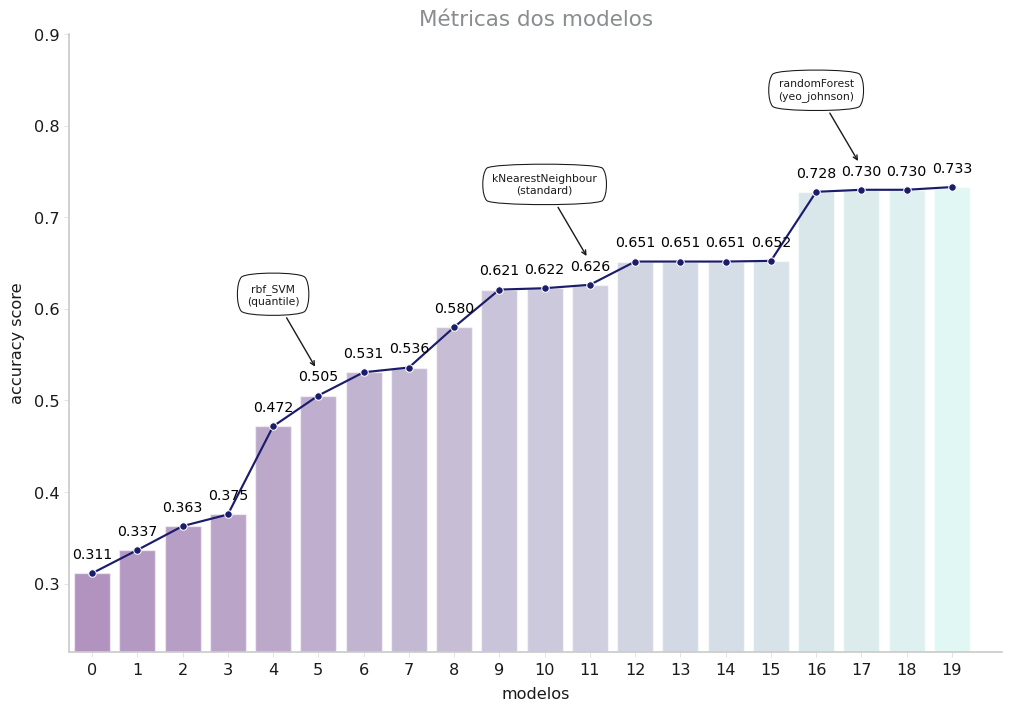

In [188]:
fig = plt.figure(constrained_layout=True, figsize=(10, 7))
gs = GridSpec(1,1, figure=fig)

ax=fig.add_subplot(gs[0, 0])


#plota grafico de linha
sns.set_theme(style="white")
sns.lineplot(ax=ax, data=df_reescrito['metricas'],             
             linewidth=0.002*tmp._k(ax),
             color=tmp.c3_forte,
             marker='o',
             markersize=0.007*tmp._k(ax))

# esceve caixas com nomes dos modelos
escreve_box(ax, data=df_reescrito)

# escreve numero na linha
an.num_graf_linhas(ax,
                   f_tam_letra=0.000017*tmp._k(ax),
                   f_texto_linha=0.00004*tmp._k(ax),
                   cor_texto='#000000',
                   d=3, 
                   rotation=0)
                

# plota as barras
sns.barplot(data=df_reescrito,
            x=[x for x in range(len(df_reescrito))],
            y='metricas',
            ax=ax,
            color='#00BFFF',
            alpha=0.5,
            palette=tmp.pmo_2(len(df_reescrito)))

# define os eixos e os limites dos eixos
tmp.set_axes_1(ax, titulo='Métricas dos modelos',xlabel='modelos',
               ylabel='accuracy score')
li.muda_limites_eixo_y(ax, frac=0.17, tipo_aumento=0)
li.muda_limites_eixo_y(ax, frac=-0.25, tipo_aumento=1)
li.muda_limites_eixo_x(ax, frac=0.03, tipo_aumento=0)

plt.show()

**Modelo selecionado** 

    A escolha de um modelo não é uma decisão unanime e vários critérios podem ser considerados  na escolha do modelo mais apropriado para um problema. Neste trabalho, escolhi para a implementação um dos modelos que apresentou o maior valor para a métrica, o modelo escolhido foi o "randomForest" com a transformação Yeo-Johoson, que segundo o gráfico acima, apresenta o terceiro maior valor para a métrica.   

    O modelo selecionado foi implementado em uma API e pode ser visto em: 
    
**OBS:** o modelo com o maior valor para a métrica é o "randomForest" com transformação "standard"